#**Data-Driven Solutions for Cost-Effective Conservation**
Group 4

Aiden Prashad

Adora Buck  

Brittany Strong

#Kaggle Global Bleaching Environmental Data set
Link: https://www.kaggle.com/datasets/pnminh95/global-bleaching-environmental

**Objectives:**
* Bleaching trends in Oceania.

* Identify key drivers (temperature thresholds, location clusters).

* Pinpoint regions where monitoring should be prioritized.

* Predictive performance of AI models.

* Cost-effective recommendations for monitoring.

* Goal - Show how AI reduces cost: instead of expensive physical monitoring everywhere, predict high-risk reefs first.

**Descriptive Analysis Objectives**
####To investigating the growth or decline of Oceania Coral Reef

* Count bleaching events by year → is it increasing or decreasing?

* Compare bleaching severity by coral reef regions (North Great Barrier Reef vs. others).

* Plot environmental drivers (temperature anomalies vs. bleaching frequency).

* Create maps of bleaching hotspots (using geopandas/folium).

**Predictive Modeling**
####Forecast bleaching events and test if AI can reduce monitoring costs
* Baseline Model: Linear Regression → predict bleaching severity from environmental variables.
* Other models: K-Nearest Neighbors (KNN) or Random Forest


**Modeling Evaluation**
####Decide which is most cost-effective (good accuracy without requiring excessive computation)
         Compare models (Linear Regression baseline vs. Random Forest Regessor)
* Accuracy, MAE, RMSE, Precision/Recall (depending on regression vs. classification)



#**Milestone 2 – Data Collection & Cleaning**

In [ ]:
import kagglehub
import pandas as pd
import os

# Download the dataset
path = kagglehub.dataset_download("pnminh95/global-bleaching-environmental")
print("Dataset path:", path)

# List all files in the dataset
print(os.listdir(path))

# Load the CSV file (replace with the exact name printed above)
csv_file = os.path.join(path, "global_bleaching_environmental.csv")
df = pd.read_csv(csv_file)

# Preview the data
print(df.head())



100%|██████████| 2.17M/2.17M [00:00<00:00, 47.3MB/s]

Extracting files...


Dataset path: /root/.cache/kagglehub/datasets/pnminh95/global-bleaching-environmental/versions/1
['global_bleaching_environmental.csv', 'data_sources.txt']
   Site_ID  Sample_ID Data_Source  Latitude_Degrees  Longitude_Degrees  \
0     2501   10324336      Donner            23.163           -82.5260   
1     3467   10324754      Donner           -17.575          -149.7833   
2     1794   10323866      Donner            18.369           -64.5640   
3     8647   10328028      Donner            17.760           -64.5680   
4     8648   10328029      Donner            17.769           -64.5830   

  Ocean_Name Reef_ID            Realm_Name  \
0   Atlantic      nd     Tropical Atlantic   
1    Pacific      nd  Eastern Indo-Pacific   
2   Atlantic      nd     Tropical Atlantic   
3   Atlantic      nd     Tropical Atlantic   
4   Atlantic      nd     Tropical Atlantic   

                               Ecoregion_Name      Country_Name  ...  \
0                     Cuba and Cayman Islands     

/tmp/ipython-input-3641575523.py:14: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [ ]:
df.describe()

Site_ID     Sample_ID  Latitude_Degrees  Longitude_Degrees  \
count  4.136100e+04  4.136100e+04      41361.000000       41361.000000   
mean   7.455816e+04  1.012880e+07          7.558085          34.966127   
std    2.520418e+05  1.373151e+06         15.732185         103.404598   
min    1.000000e+00  9.623000e+03        -30.262500        -179.974300   
25%    3.502000e+03  1.031108e+07         -4.902500         -78.385600   
50%    5.925000e+03  1.031628e+07         10.776100          96.843300   
75%    8.368000e+03  1.032149e+07         20.050500         120.880400   
max    1.000060e+06  1.033171e+07         36.750000         179.964500   

       Cyclone_Frequency      Date_Day    Date_Month     Date_Year  
count       41361.000000  41361.000000  41361.000000  41361.000000  
mean           52.159650     16.037402      6.902686   2007.796765  
std             7.589593      7.837400      2.875063      6.073043  
min            18.310000      1.000000      1.000000   1980.000000  
25%            47.940000     10.000000      5.000000   2003.000000  
50%            50.920000     15.000000      7.000000   2007.000000  
75%            55.730000     22.000000      9.000000   2013.000000  
max           105.800000     31.000000     12.000000   2020.000000

In [ ]:
df.isnull().sum()

Site_ID               0
Sample_ID             0
Data_Source           0
Latitude_Degrees      0
Longitude_Degrees     0
                     ..
TSA_DHWMean           0
Date                  0
Site_Comments         0
Sample_Comments       0
Bleaching_Comments    0
Length: 62, dtype: int64

####Check for duplicates

In [ ]:
# Get all duplicate rows (including the first occurrence if keep=False)
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [Site_ID, Sample_ID, Data_Source, Latitude_Degrees, Longitude_Degrees, Ocean_Name, Reef_ID, Realm_Name, Ecoregion_Name, Country_Name, State_Island_Province_Name, City_Town_Name, Site_Name, Distance_to_Shore, Exposure, Turbidity, Cyclone_Frequency, Date_Day, Date_Month, Date_Year, Depth_m, Substrate_Name, Percent_Cover, Bleaching_Level, Percent_Bleaching, ClimSST, Temperature_Kelvin, Temperature_Mean, Temperature_Minimum, Temperature_Maximum, Temperature_Kelvin_Standard_Deviation, Windspeed, SSTA, SSTA_Standard_Deviation, SSTA_Mean, SSTA_Minimum, SSTA_Maximum, SSTA_Frequency, SSTA_Frequency_Standard_Deviation, SSTA_FrequencyMax, SSTA_FrequencyMean, SSTA_DHW, SSTA_DHW_Standard_Deviation, SSTA_DHWMax, SSTA_DHWMean, TSA, TSA_Standard_Deviation, TSA_Minimum, TSA_Maximum, TSA_Mean, TSA_Frequency, TSA_Frequency_Standard_Deviation, TSA_FrequencyMax, TSA_FrequencyMean, TSA_DHW, TSA_DHW_Standard_Deviation, TSA_DHWMax, TSA_DHWMean, Date, Site_Comments, Sample_Comments, Bl

#####No duplicates in the dataset.

##Clean Dataset

In [ ]:
df_clean = df.dropna(axis=1)
print(df_clean.head())

   Site_ID  Sample_ID Data_Source  Latitude_Degrees  Longitude_Degrees  \
0     2501   10324336      Donner            23.163           -82.5260   
1     3467   10324754      Donner           -17.575          -149.7833   
2     1794   10323866      Donner            18.369           -64.5640   
3     8647   10328028      Donner            17.760           -64.5680   
4     8648   10328029      Donner            17.769           -64.5830   

  Ocean_Name Reef_ID            Realm_Name  \
0   Atlantic      nd     Tropical Atlantic   
1    Pacific      nd  Eastern Indo-Pacific   
2   Atlantic      nd     Tropical Atlantic   
3   Atlantic      nd     Tropical Atlantic   
4   Atlantic      nd     Tropical Atlantic   

                               Ecoregion_Name      Country_Name  ...  \
0                     Cuba and Cayman Islands              Cuba  ...   
1            Society Islands French Polynesia  French Polynesia  ...   
2  Hispaniola Puerto Rico and Lesser Antilles    United Kingdo

##**Handle 'nd' data**

In [ ]:
df_clean = df_clean.replace('nd', pd.NA)
df_clean = df_clean.apply(pd.to_numeric, errors='ignore')

/tmp/ipython-input-121769888.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean = df_clean.apply(pd.to_numeric, errors='ignore')


In [ ]:
df_clean.isna().sum()

Site_ID                   0
Sample_ID                 0
Data_Source               0
Latitude_Degrees          0
Longitude_Degrees         0
                      ...  
TSA_DHWMean             132
Date                      0
Site_Comments         39104
Sample_Comments       38403
Bleaching_Comments    38692
Length: 62, dtype: int64

###Below we changed the 'nd' no data rows with NaN

In [ ]:
print(df_clean['Percent_Bleaching'])

0        50.2
1        50.7
2        50.9
3        50.9
4        50.9
         ... 
41356     NaN
41357     NaN
41358     NaN
41359     NaN
41360     NaN
Name: Percent_Bleaching, Length: 41361, dtype: float64


Cleaned dataset still has 41,360 entries

#**List of All Columns**

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                41361 non-null  int64  
 1   Sample_ID                              41361 non-null  int64  
 2   Data_Source                            41361 non-null  object 
 3   Latitude_Degrees                       41361 non-null  float64
 4   Longitude_Degrees                      41361 non-null  float64
 5   Ocean_Name                             41361 non-null  object 
 6   Reef_ID                                28821 non-null  object 
 7   Realm_Name                             41361 non-null  object 
 8   Ecoregion_Name                         41358 non-null  object 
 9   Country_Name                           41360 non-null  object 
 10  State_Island_Province_Name             41262 non-null  object 
 11  Ci

In [ ]:
# column names
print(df.columns)

# the unique values in the country/region column
print(df["Ecoregion_Name"].unique())

Index(['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees',
       'Longitude_Degrees', 'Ocean_Name', 'Reef_ID', 'Realm_Name',
       'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name',
       'City_Town_Name', 'Site_Name', 'Distance_to_Shore', 'Exposure',
       'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year',
       'Depth_m', 'Substrate_Name', 'Percent_Cover', 'Bleaching_Level',
       'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Freq

#**Australia Descriptive Analysis**

##Replacing the NaN data with median values
##**Use df_median for analysis**

In [ ]:
df_median = df_clean.fillna(df_clean.median(numeric_only=True))
print(df_median.describe())

            Site_ID     Sample_ID  Latitude_Degrees  Longitude_Degrees  \
count  4.136100e+04  4.136100e+04      41361.000000       41361.000000   
mean   7.455816e+04  1.012880e+07          7.558085          34.966127   
std    2.520418e+05  1.373151e+06         15.732185         103.404598   
min    1.000000e+00  9.623000e+03        -30.262500        -179.974300   
25%    3.502000e+03  1.031108e+07         -4.902500         -78.385600   
50%    5.925000e+03  1.031628e+07         10.776100          96.843300   
75%    8.368000e+03  1.032149e+07         20.050500         120.880400   
max    1.000060e+06  1.033171e+07         36.750000         179.964500   

       Distance_to_Shore     Turbidity  Cyclone_Frequency      Date_Day  \
count       41361.000000  41361.000000       41361.000000  41361.000000   
mean         3761.604931      0.067093          52.159650     16.037402   
std         13550.106660      0.063009           7.589593      7.837400   
min             3.200000      0.0

In [ ]:
df_median.isna().sum()

Site_ID                   0
Sample_ID                 0
Data_Source               0
Latitude_Degrees          0
Longitude_Degrees         0
                      ...  
TSA_DHWMean               0
Date                      0
Site_Comments         39104
Sample_Comments       38403
Bleaching_Comments    38692
Length: 62, dtype: int64

#Dataset Limited by Australia

In [ ]:
australia_df = df_median[df_median['Country_Name']=='Australia']
print(australia_df.head())

     Site_ID  Sample_ID Data_Source  Latitude_Degrees  Longitude_Degrees  \
9        499   10322424      Donner          -19.1975           146.8150   
42       886   10323001      Donner          -18.7100           146.5700   
61       121   10322138      Donner          -19.1500           146.8500   
227      500   10322425      Donner          -18.6600           146.5600   
291       29   10322095      Donner          -23.4439           151.9286   

    Ocean_Name Reef_ID            Realm_Name  \
9      Pacific    <NA>  Central Indo-Pacific   
42     Pacific    <NA>  Central Indo-Pacific   
61     Pacific    <NA>  Central Indo-Pacific   
227    Pacific    <NA>  Central Indo-Pacific   
291    Pacific    <NA>  Central Indo-Pacific   

                              Ecoregion_Name Country_Name  ...  \
9    Central and northern Great Barrier Reef    Australia  ...   
42   Central and northern Great Barrier Reef    Australia  ...   
61   Central and northern Great Barrier Reef    Australi

In [ ]:
australia_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2956 entries, 9 to 41344
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                2956 non-null   int64  
 1   Sample_ID                              2956 non-null   int64  
 2   Data_Source                            2956 non-null   object 
 3   Latitude_Degrees                       2956 non-null   float64
 4   Longitude_Degrees                      2956 non-null   float64
 5   Ocean_Name                             2956 non-null   object 
 6   Reef_ID                                2023 non-null   object 
 7   Realm_Name                             2956 non-null   object 
 8   Ecoregion_Name                         2956 non-null   object 
 9   Country_Name                           2956 non-null   object 
 10  State_Island_Province_Name             2956 non-null   object 
 11  City_Tow

In [ ]:
#percent bleaching by coral reefs
bleaching_by_reef = australia_df.groupby('Ecoregion_Name')['Percent_Bleaching'].mean().reset_index(name='Percent_Bleaching')
bleaching_by_reef

Ecoregion_Name  Percent_Bleaching
0                         Arnhem Land north Australia           1.300000
1                   Ashmore Reef north-west Australia           7.000000
2             Central and northern Great Barrier Reef          15.747551
3                       Christmas Island Indian Ocean           0.883902
4                   Cocos Keeling Atolls Indian Ocean           1.188515
5                                           Coral Sea           2.926667
6                              Darwin north Australia         100.000000
7             Houtman Abrolhos Islands west Australia           0.583333
8                Kimberley Coast north-west Australia          48.582000
9                       Moreton Bay eastern Australia           4.595884
10     Ningaloo Reef and coastal north-west Australia           9.232667
11  Pompey and Swain Reefs south-east Great Barrie...          17.745455
12                       Rowley Shoals west Australia           5.500000
13                          Scott Reef west Australia          60.166667
14                        Southern Great Barrier Reef          29.526303
15  Torres Strait and far northern Great Barrier Reef          18.862500

In [ ]:
#percent bleaching by coral reefs
bleaching_by_reef = australia_df.groupby('Ecoregion_Name').size().reset_index(name='Percent_Bleaching')
bleaching_by_reef

Ecoregion_Name  Percent_Bleaching
0                         Arnhem Land north Australia                  5
1                   Ashmore Reef north-west Australia                  3
2             Central and northern Great Barrier Reef               1613
3                       Christmas Island Indian Ocean                 41
4                   Cocos Keeling Atolls Indian Ocean                101
5                                           Coral Sea                 48
6                              Darwin north Australia                  2
7             Houtman Abrolhos Islands west Australia                  6
8                Kimberley Coast north-west Australia                 10
9                       Moreton Bay eastern Australia                571
10     Ningaloo Reef and coastal north-west Australia                 60
11  Pompey and Swain Reefs south-east Great Barrie...                 55
12                       Rowley Shoals west Australia                  1
13                          Scott Reef west Australia                  3
14                        Southern Great Barrier Reef                357
15  Torres Strait and far northern Great Barrier Reef                 80

#**Milestone 3 – Exploratory Data Analysis (EDA)**

#**Descriptive Analysis for Week 6**
####The analysis below ⬇️ are the same from discord

#**Summary Statistics**



###**Calculation of Summary Statistics for each Environmental Factor**
Mean, Median, Describe, Spread/Variability, Skewness
* Temperature Mean ✅
* Turbidity ✅
* Cyclone Frequency ✅
* Thermal Stress Anomalies ✅
* Thermal Stress Anamoly Degree heating weeks ✅
* Sea Surface Anomalies ✅

**Temperature Mean**

In [ ]:
#Temperature Mean Statistics
print("Temperature Mean (median) ", australia_df['Temperature_Mean'].median())
print("\n")
print("Temperature Mean Summary Statistics: ", australia_df['Temperature_Mean'].describe())

Temperature Mean (median)  299.09


Temperature Mean Summary Statistics:  count    2956.000000
mean      298.556637
std         1.332121
min       295.010000
25%       297.350000
50%       299.090000
75%       299.570000
max       301.950000
Name: Temperature_Mean, dtype: float64


Skewness: Is the Temperature Mean skewed or normal?
close to 0 - Normal Distribution
Larger than -2 and +2 - skewness

In [ ]:
print("Temperature Mean skew: ", australia_df['Temperature_Mean'].skew())

Temperature Mean skew:  -0.5683665305384673


Temperature has a relatively good distribution.

**Turbidity**

In [ ]:
#Turbidity Statistics
print("Turbidity (median) ", australia_df['Turbidity'].median())
print("\n")
print("Turbidity Summary Statistics: ", australia_df['Turbidity'].describe())

Turbidity (median)  0.0726


Turbidity Summary Statistics:  count    2956.000000
mean        0.092016
std         0.061376
min         0.000000
25%         0.060100
50%         0.072600
75%         0.106400
max         0.524600
Name: Turbidity, dtype: float64


Skewness: Is the Turbidity skewed or normal?

In [ ]:
print("Turbidity skew: ", australia_df['Turbidity'].skew())

Turbidity skew:  1.524307301228351


Turbidity column has a slightly elevated skew.  

**Cyclone Frequency**

In [ ]:
#Cyclone_Frequency
print("Cyclone Frequency (median) ", australia_df['Cyclone_Frequency'].median())
print("\n")
print("Cyclone Frequency Summary Statistics: ", australia_df['Cyclone_Frequency'].describe())

Cyclone Frequency (median)  48.04


Cyclone Frequency Summary Statistics:  count    2956.000000
mean       48.294892
std         7.009392
min        18.310000
25%        43.520000
50%        48.040000
75%        50.970000
max       102.370000
Name: Cyclone_Frequency, dtype: float64


Skewness: Is the Cyclone Frequency skewed or normal?

In [ ]:
print("Cyclone Frequency skew: ", australia_df['Cyclone_Frequency'].skew())

Cyclone Frequency skew:  1.2953772194091469


Cyclone frequency column has a slightly elevated skew.  

**Thermal Stress Anomalies (TSA)**

In [ ]:
print("Thermal Stress Anomalies  (median) ", australia_df['TSA'].median())
print("\n")
print("Thermal Stress Anomalies  Summary Statistics: ", australia_df['TSA'].describe())

Thermal Stress Anomalies  (median)  -1.5550000000000002


Thermal Stress Anomalies  Summary Statistics:  count    2956.000000
mean       -1.958846
std         2.093957
min        -9.090000
25%        -2.960000
50%        -1.555000
75%        -0.480000
max         5.240000
Name: TSA, dtype: float64


Skewness: Is the Thermal Stress Anomalies skewed or normal?

In [ ]:
print("Thermal Stress Anomalies skew: ", australia_df['TSA'].skew())

Thermal Stress Anomalies skew:  -0.7012611206800294


TSA has a relatively normal distribution.

**Thermal Stress Anomalies Degree Heating Weeks (TSA_DHW)**

In [ ]:
print("Thermal Stress Anomalies Degree Heating weeks (median) ", australia_df['TSA_DHW'].median())
print("\n")
print("Thermal Stress Anomalies Degree Heating weeks Summary Statistics: ", australia_df['TSA_DHW'].describe())

Thermal Stress Anomalies Degree Heating weeks (median)  0.0


Thermal Stress Anomalies Degree Heating weeks Summary Statistics:  count    2956.000000
mean        2.427009
std         5.362647
min         0.000000
25%         0.000000
50%         0.000000
75%         2.802500
max        44.520000
Name: TSA_DHW, dtype: float64


Skewness: Is the TSA Degree heating weeks skewed or normal?

In [ ]:
print("Thermal Stress Anomalies degree heating weeks skew: ", australia_df['TSA_DHW'].skew())

Thermal Stress Anomalies degree heating weeks skew:  4.262274432401247


The Thermal Anomalies degree heating weeks column is highly skewed.

**Sea Surface Temperature Anomalies (SSTA)**

In [ ]:
print("Sea Surface Temperature Anomalies (median) ", australia_df['SSTA'].median())
print("\n")
print("Sea Surface Anomalies Temperature Summary Statistics: ", australia_df['SSTA'].describe())

Sea Surface Temperature Anomalies (median)  0.37


Sea Surface Anomalies Temperature Summary Statistics:  count    2956.000000
mean        0.300866
std         0.841752
min        -3.500000
25%        -0.170000
50%         0.370000
75%         0.800000
max         5.480000
Name: SSTA, dtype: float64


Skewness: Is the Sea Surface Anomalies skewed or normal?

In [ ]:
print("Sea Surface Anomalies skew: ", australia_df['SSTA'].skew())

Sea Surface Anomalies skew:  -0.108590260047254


Sea Surface Anomalies has a normal distribution.

**Sea Surface Temperature Anomalies Degree Heating weeks (SSTA_DHW)**

In [ ]:

#SSTA_DHW
print("Sea Surface Temperature Anomalies Degree Heating weeks (median) ", australia_df['SSTA_DHW'].median())
print("\n")
print("Sea Surface Temperature Anomalies Degree Heating weeks Summary Statistics: ", australia_df['SSTA_DHW'].describe())

Sea Surface Temperature Anomalies Degree Heating weeks (median)  2.23


Sea Surface Temperature Anomalies Degree Heating weeks Summary Statistics:  count    2956.000000
mean        4.281113
std         6.241155
min         0.000000
25%         0.000000
50%         2.230000
75%         6.155000
max        47.170000
Name: SSTA_DHW, dtype: float64


Skewness: Is SSTA_DHW skewed or normal?

In [ ]:
print("Sea Surface Temperature Anomalies Degree Heating weeks skew: ", australia_df['SSTA_DHW'].skew())

Sea Surface Temperature Anomalies Degree Heating weeks skew:  3.0771501766572085


Sea Surface Temperature Anomalies Degree Heating weeks is highly skewed.

In [ ]:
#climate sea surface temperature
print("Climate Sea Surface Temperature (median) ", australia_df['ClimSST'].median())
print("\n")
print("Climate Sea Surface Temperature Summary Statistics: ", australia_df['ClimSST'].describe())

Climate Sea Surface Temperature (median)  298.88


Climate Sea Surface Temperature Summary Statistics:  count    2956.000000
mean      296.855903
std         8.174424
min       262.150000
25%       297.410000
50%       298.880000
75%       299.870000
max       302.550000
Name: ClimSST, dtype: float64


#Grouped summaries:

* Track changes in percent bleaching over years. australia_df['Date_Year'], australia_df['Percent_Bleaching'] ✅


* Compare ecoregion / site in percent bleaching and percent cover. australia_df['Ecoregion_Name'] ✅

####**Track Changes in Percent Bleaching over Years**
* australia_df['Date_Year']
* australia_df['Percent_Bleaching']

Change in Coral Reef cover over Years




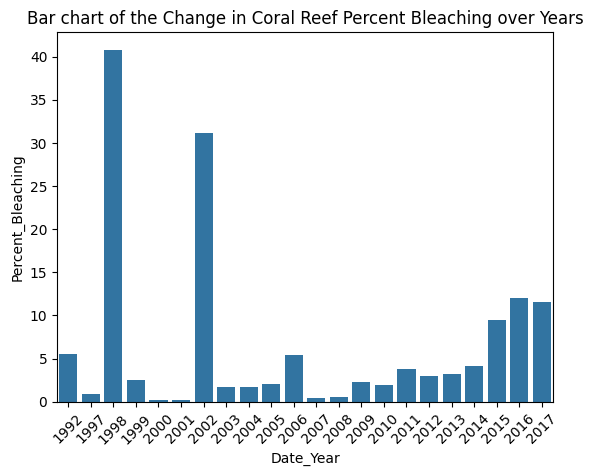

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#grouped summary by year and percent coverage
reef_year_change = (australia_df.groupby('Date_Year')['Percent_Bleaching'].mean().reset_index())
print("Change in Coral Reef cover over Years")
# print(reef_year_change)

print("\n")

sns.barplot(data = reef_year_change, x = 'Date_Year', y = 'Percent_Bleaching')
plt.xlabel('Date_Year')
plt.ylabel('Percent_Bleaching')
plt.title('Bar chart of the Change in Coral Reef Percent Bleaching over Years')
plt.xticks(rotation = 45)
plt.show()

####**Compare Percent Cover over Ecological region**

Compare coral reef cover between Ecological Region




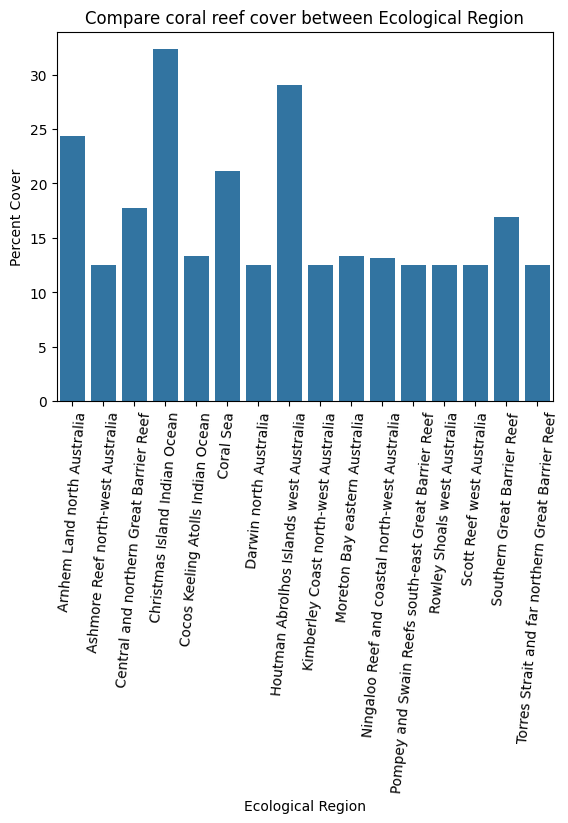

In [ ]:
import seaborn as sns
cover_ecoregion_change = (australia_df.groupby('Ecoregion_Name')['Percent_Cover'].mean().reset_index())
print("Compare coral reef cover between Ecological Region")
# print(cover_ecoregion_change)
print("\n")

sns.barplot(data = cover_ecoregion_change, x = "Ecoregion_Name", y = "Percent_Cover")
plt.xlabel('Ecological Region')
plt.ylabel('Percent Cover')
plt.title('Compare coral reef cover between Ecological Region')
plt.xticks(rotation = 85)
plt.show()

The Percent Cover column tells us how much of the coral reef is still covered by algae. A hugh percent cover indicates that the coral reef condition is healthy while a low percent cover indicates bleaching. In the histogram we see that the Christmas Island Indian Ocean coral reef, Houtman Abrolhos Island west Australia coral reef, and Arnhern Land north Australia corael reef have high percent coverages, suggesting that the bleaching percentage is lower in these reefs.  

####**Compare Percent Bleaching over Ecological region**

Compare coral reef cover between Ecological Region




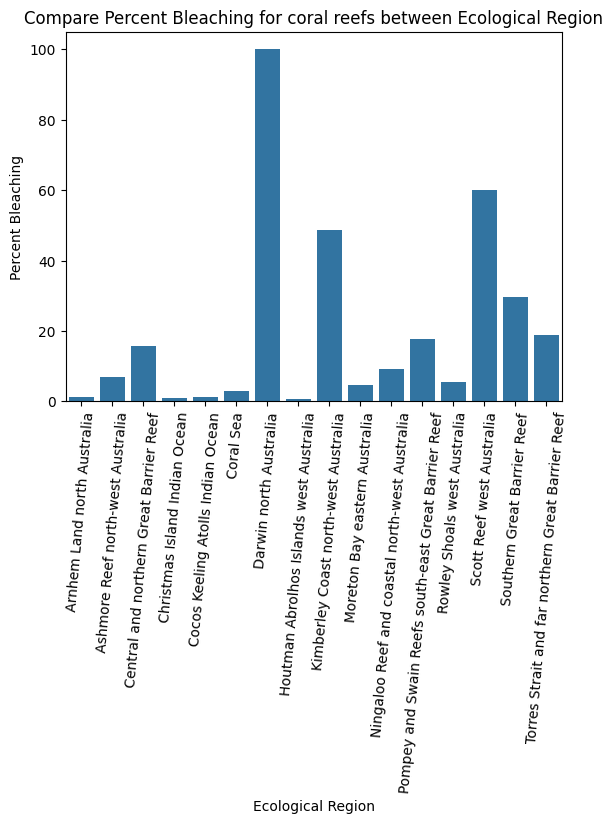

In [ ]:
import seaborn as sns
cover_ecoregion_change = (australia_df.groupby('Ecoregion_Name')['Percent_Bleaching'].mean().reset_index())
print("Compare coral reef cover between Ecological Region")
# print(cover_ecoregion_change)
print("\n")

sns.barplot(data = cover_ecoregion_change, x = "Ecoregion_Name", y = "Percent_Bleaching")
plt.xlabel('Ecological Region')
plt.ylabel('Percent Bleaching')
plt.title('Compare Percent Bleaching for coral reefs between Ecological Region')
plt.xticks(rotation = 85)
plt.show()

The percent bleaching column tells us the percent of the coral reef that has been bleached. In the graph, it can be seen that the Darwin north Australia reef, Kimberely Coast north-west Australia reefs, and Scott west Australia, and Southern Great Barrier Reef reefs have higher percent of bleaching in comparison to the others.

####What happened in 1998, 2002, and 2016?

#####According to World Economic Forum, The first recorded extensive bleaching of Australian coral reefs occured in 1998. This was due to elevated sea surface temperatures and changes to solar radaiton. In every other year where there was a spike in sea surface temperature and climate change, such as 2002 and 2016, coral reef bleaching occured.

######https://www.weforum.org/stories/2021/11/only-two-percent-of-the-great-barrier-reef-has-escaped-coral-bleaching/#:~:text=The%20great%20barrier%20reef%20has%20experienced%20five%20mass%20bleaching%20events,intense%20and%20widespread%20bleaching%20events.

Compare differences in distance to shore between ecoregions

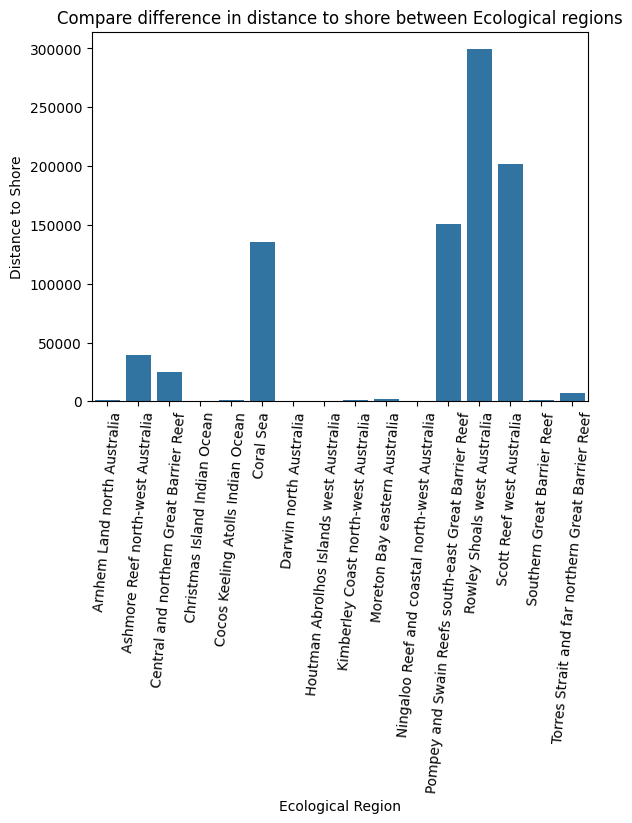

In [ ]:
import seaborn as sns
reef_shore_distance = (australia_df.groupby('Ecoregion_Name')['Distance_to_Shore'].mean().reset_index())
reef_shore_distance

sns.barplot(data = reef_shore_distance, x = 'Ecoregion_Name', y = 'Distance_to_Shore')
plt.xlabel('Ecological Region')
plt.ylabel('Distance to Shore')
plt.title('Compare difference in distance to shore between Ecological regions')
plt.xticks(rotation = 85)
plt.show()

The reefs frutherest in distance to shore are Coral Sea reef, Rowley shoals west Australia reef, Scott Reef west Australia, and the Ningaloo Reef and Coastal north-west Australia reef. The reef that suffer the most bleaching Darwin north australia and Scott Reef West differ in distance from shore.

Difference in Coral reef sea depth meter

In [ ]:
reef_ocean_depth = australia_df.groupby('Ecoregion_Name')['Depth_m'].mean().reset_index()
# reef_ocean_depth

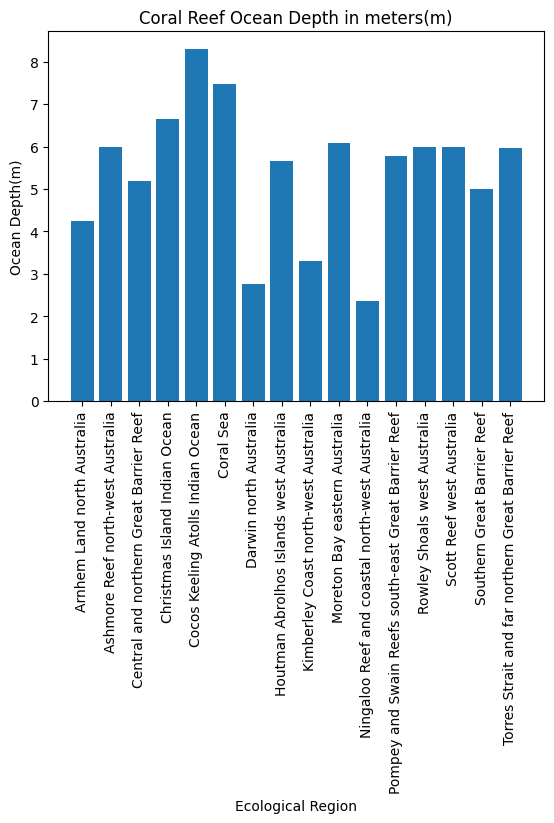

In [ ]:

plt.bar(reef_ocean_depth['Ecoregion_Name'], reef_ocean_depth['Depth_m'])
plt.xlabel('Ecological Region')
plt.ylabel('Ocean Depth(m)')
plt.title('Coral Reef Ocean Depth in meters(m)')
plt.xticks(rotation = 90)
plt.show()

Cocos keeling Atolls Indian Ocean coral reefs are the frutherst in ocean depth at 8.3 meters. Followed by Coral Sea reefs, Christmas Island Indian Ocean reefs, Ashmore north-west Australia reef, Moreton Bay eastern Australia reef, and parts of the Great Barrier reef.

#**Descriptive Analysis for Week 6**
####The analysis below ⬇️ are the same from discord


####**Count bleaching events by year (Trend Plot)**
* australia_df['Date_Year']
* australia_df['Percent_Bleaching']

**(Aiden)Compare bleaching severity by coral region**
* australia_df['Percent_Bleaching']
* australia_df['Ecoregion_Name']

####**Brittany - Plot Environmental Factors: temperature anomalies vs. bleaching frequency**
* australia_df['Turbidity']
* australia_df['Cyclone_Frequency'] ✅
* australia_df['Depth_m '] ✅
* australia_df['SSTA'] ✅
* australia_df['SSTA_DHW'] ✅
* australia_df['TSA_DHW']
* australia_df['Windspeed'] ✅                
* australia_df['Temperature_Mean'] ✅                


Sea Surface Temperature Anomalies vs. Bleaching Frequency Boxplot

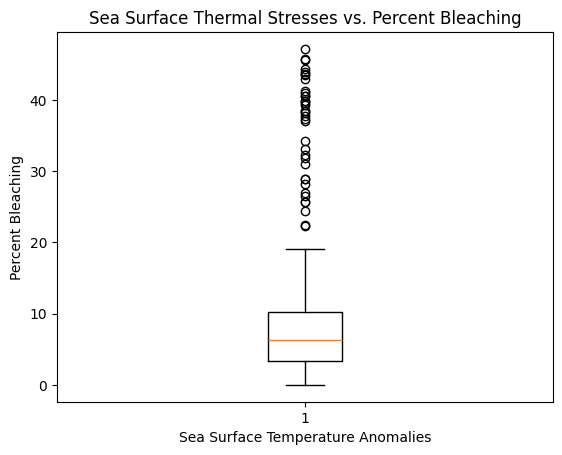

In [ ]:
#Sea Surface Temperature Anomalies grouped by Bleaching
ssta_dhw_bleaching = (australia_df.groupby('SSTA_DHW')['Percent_Bleaching'].mean().reset_index())
ssta_dhw_bleaching

plt.boxplot(data = ssta_dhw_bleaching, x = 'SSTA_DHW')
plt.title('Sea Surface Thermal Stresses vs. Percent Bleaching')
plt.xlabel('Sea Surface Temperature Anomalies')
plt.ylabel('Percent Bleaching')
plt.show()

In [ ]:
print(australia_df['TSA_Mean'])

9       -3.37
42      -2.80
61      -3.39
227     -0.06
291     -0.13
         ... 
35360   -3.36
35361   -3.36
35362   -1.49
41343   -1.49
41344   -3.11
Name: TSA_Mean, Length: 2956, dtype: float64


Compare Temperature min and temperature max to the average temperature

/tmp/ipython-input-1962667538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  australia_df['Date_Year'] = pd.to_numeric(australia_df['Date_Year'], errors='coerce')


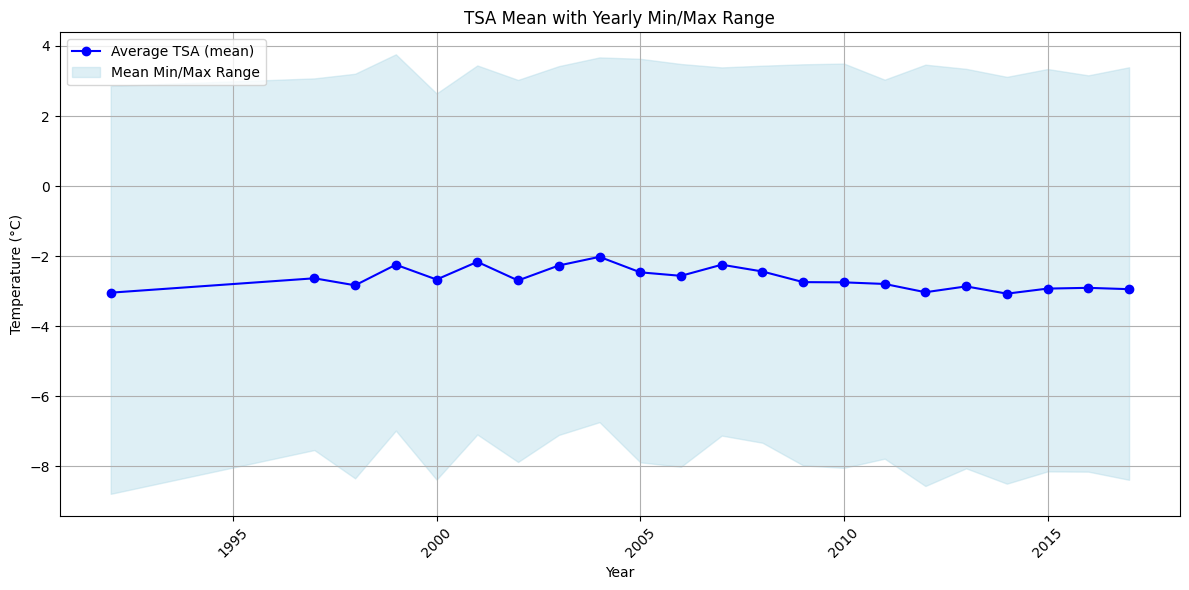

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Date_Year is numeric and sorted
australia_df['Date_Year'] = pd.to_numeric(australia_df['Date_Year'], errors='coerce')
australia_df = australia_df.dropna(subset=['Date_Year']).sort_values('Date_Year')

# Aggregate by year: mean of the TSA statistics for that year
agg = (australia_df
       .groupby('Date_Year')
       .agg(TSA_Mean=('TSA_Mean', 'mean'),
            TSA_Minimum=('TSA_Minimum', 'mean'),
            TSA_Maximum=('TSA_Maximum', 'mean'))
       .reset_index())

plt.figure(figsize=(12,6))
plt.plot(agg['Date_Year'], agg['TSA_Mean'], label='Average TSA (mean)', color='blue', marker='o')
plt.fill_between(agg['Date_Year'], agg['TSA_Minimum'], agg['TSA_Maximum'],
                 color='lightblue', alpha=0.4, label='Mean Min/Max Range')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('TSA Mean with Yearly Min/Max Range')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





Line plot to track the fluctation in windspeed

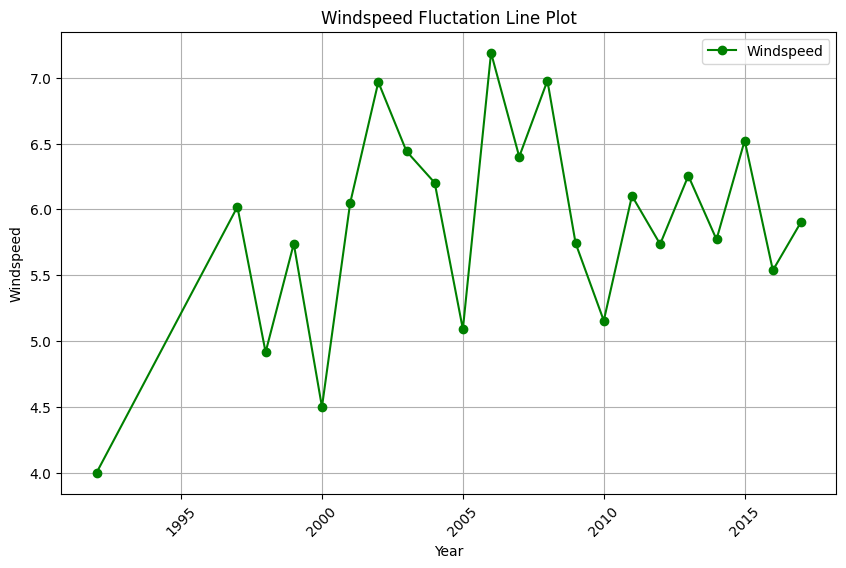

In [ ]:
group_wind_year = australia_df.groupby('Date_Year')['Windspeed'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(group_wind_year['Date_Year'], group_wind_year['Windspeed'], label = 'Windspeed', color = 'green', marker = 'o')

plt.xlabel('Year')
plt.ylabel('Windspeed')
plt.title('Windspeed Fluctation Line Plot')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

Line plot for Climate Sea Surface Temperature

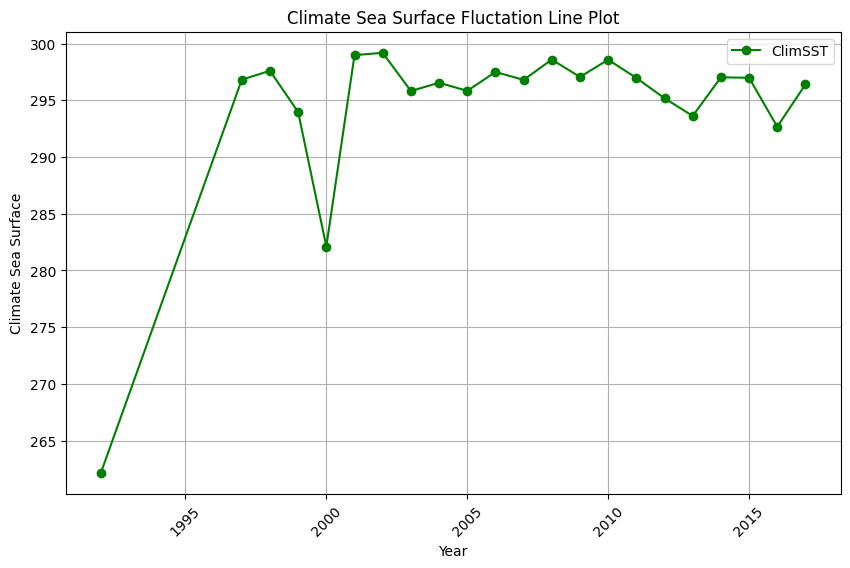

In [ ]:
group_wind_year = australia_df.groupby('Date_Year')['ClimSST'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(group_wind_year['Date_Year'], group_wind_year['ClimSST'], label = 'ClimSST', color = 'green', marker = 'o')

plt.xlabel('Year')
plt.ylabel('Climate Sea Surface')
plt.title('Climate Sea Surface Fluctation Line Plot')
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

####Bar Chart of Percent Bleaching by Oceania Region

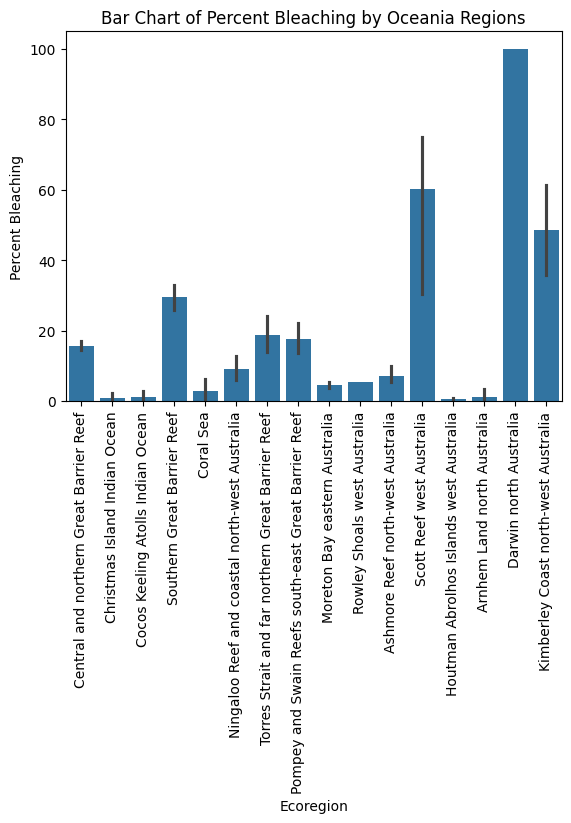

In [ ]:
#Bar Chart of overall percent bleaching by region
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.barplot(x = australia_df['Ecoregion_Name'], y = australia_df['Percent_Bleaching'])
plt.xlabel('Ecoregion')
plt.ylabel('Percent Bleaching')
plt.title('Bar Chart of Percent Bleaching by Oceania Regions')
plt.xticks(rotation = 90)
plt.show()

Sea Surface Temperature Anomalies

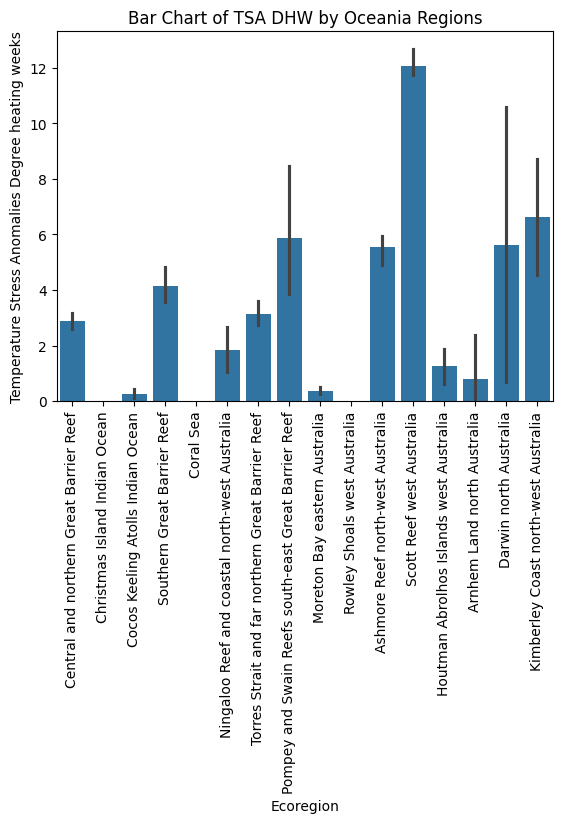

In [ ]:
#Bar Chart of overall percent bleaching by region
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.barplot(x = australia_df['Ecoregion_Name'], y = australia_df['TSA_DHW'])
plt.xlabel('Ecoregion')
plt.ylabel('Temperature Stress Anomalies Degree heating weeks')
plt.title('Bar Chart of TSA DHW by Oceania Regions')
plt.xticks(rotation = 90)
plt.show()

Darwin North Australia reef and Scott West Australia reef which have the highest percent bleaching in the dataset, have high amounts of temeprature stress anomalies degree heating weeks. This means that there could be a strong correlation between tsa degree heating weeks and percent bleaching.

Comparing tsa_dhw and percent bleaching

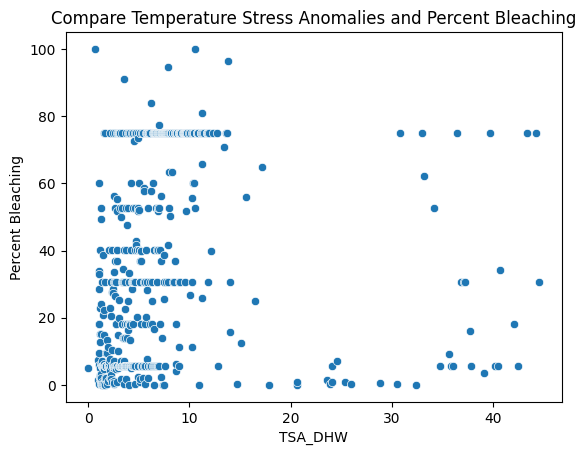

In [ ]:
tsa_bleaching = (australia_df.groupby('TSA_DHW')['Percent_Bleaching'].mean().reset_index())

sns.scatterplot(data = tsa_bleaching, x = 'TSA_DHW', y = 'Percent_Bleaching')
plt.xlabel('TSA_DHW')
plt.ylabel('Percent Bleaching')
plt.title('Compare Temperature Stress Anomalies and Percent Bleaching')
plt.show()

This indicates that there is a strong correlation between temnperature stress anomalies degree heating weeks and percent bleaching.

####Environmental Factors: Overall Temperature Mean vs the Percent Bleaching

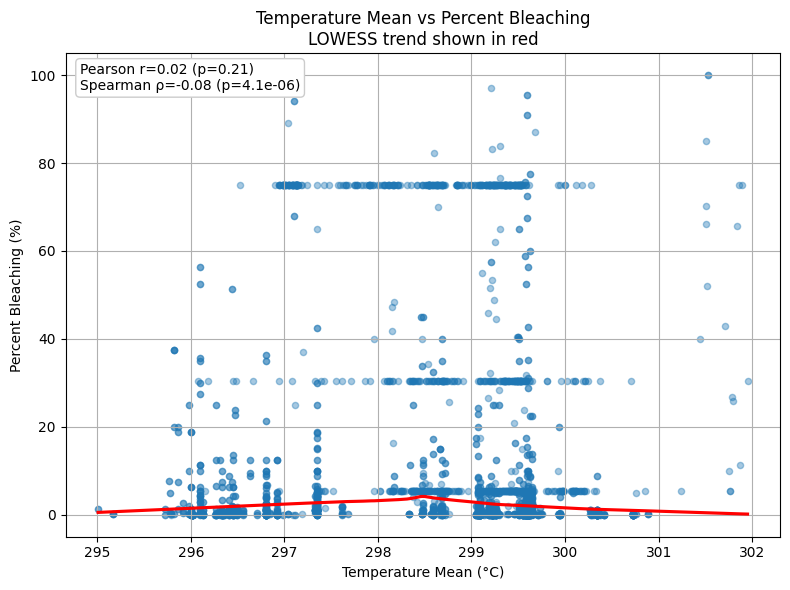

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Optional: drop rows with missing values
df = australia_df.dropna(subset=['Temperature_Mean', 'Percent_Bleaching'])

plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Temperature_Mean', y='Percent_Bleaching',
            scatter_kws={'alpha':0.4, 's':20},  # make points semi-transparent
            line_kws={'color':'red'}, lowess=True)  # lowess=True gives a smooth trend

# Compute Pearson and Spearman
pearson_r, pearson_p = stats.pearsonr(df['Temperature_Mean'], df['Percent_Bleaching'])
spearman_r, spearman_p = stats.spearmanr(df['Temperature_Mean'], df['Percent_Bleaching'])

plt.xlabel('Temperature Mean (°C)')
plt.ylabel('Percent Bleaching (%)')
plt.title('Temperature Mean vs Percent Bleaching\nLOWESS trend shown in red')
plt.annotate(f'Pearson r={pearson_r:.2f} (p={pearson_p:.2g})\nSpearman ρ={spearman_r:.2f} (p={spearman_p:.2g})',
             xy=(0.02, 0.98), xycoords='axes fraction', va='top', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="0.8"))
plt.grid(True)
plt.tight_layout()
plt.show()


####Line Plot of Temperature Mean over the Number of Years by Coral Reef Regions

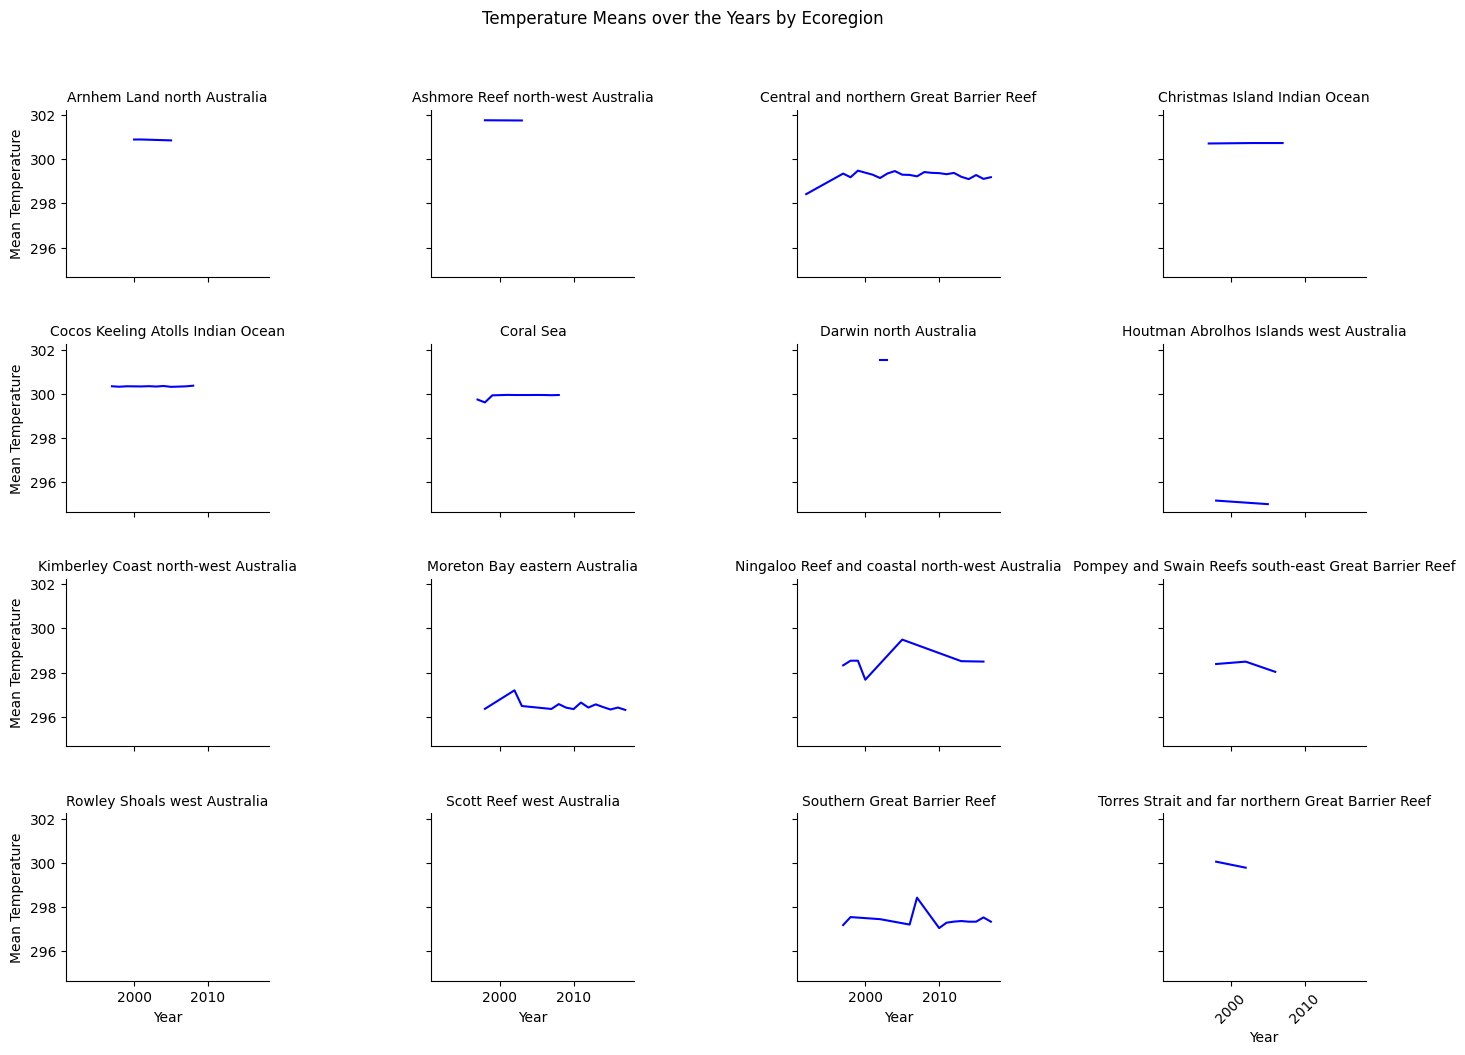

In [ ]:
# aggregated dataframe as the FacetGrid data source
agg = (australia_df
       .groupby(['Ecoregion_Name', 'Date_Year'])['Temperature_Mean']
       .mean()
       .reset_index())

g = sns.FacetGrid(agg, col='Ecoregion_Name', col_wrap=4, sharey=True)
g.map(plt.plot, 'Date_Year', 'Temperature_Mean', color='blue')
g.set_axis_labels("Year", "Mean Temperature")
g.set_titles("{col_name}")
g.fig.set_size_inches(14,10)
g.fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.8)
g.fig.suptitle('Temperature Means over the Years by Ecoregion', y=1.02)
plt.xticks(rotation=45)
plt.show()

###**Map of bleaching hotspots**
* australia_df['Percent_Bleaching']

In [ ]:
import folium

# Keep only the columns we need
australia_points = australia_df[['Latitude_Degrees', 'Longitude_Degrees', 'Percent_Bleaching', 'Ecoregion_Name', 'Date_Year']].copy()

# Convert the columns into numbers
australia_points['Percent_Bleaching'] = pd.to_numeric(australia_points['Percent_Bleaching'], errors='coerce')
australia_points['Date_Year'] = pd.to_numeric(australia_points['Date_Year'], errors='coerce')

# # Only keep rows from 2010 and later
australia_points = australia_points[australia_points['Date_Year'] >= 2000]

# Drop rows with missing data
australia_points = australia_points.dropna()

# Sort by year so latest comes first
australia_points = australia_points.sort_values(by='Date_Year', ascending=False)

# Drop duplicates by location, keeping the latest year
australia_points_latest = australia_points.drop_duplicates(subset=['Latitude_Degrees', 'Longitude_Degrees'], keep='first')

# Make a map of Australia
australia_map = folium.Map(location=[-25, 134], zoom_start=4)

# Add some different map styles
folium.TileLayer('Stamen Terrain', attr='Map tiles by Stamen Design, Data by OpenStreetMap').add_to(australia_map)
folium.TileLayer('Stamen Toner', attr='Map tiles by Stamen Design, Data by OpenStreetMap').add_to(australia_map)

# Function for coloring the points
def pick_color(value):
    if value <= 10:
        return 'green'
    elif value <= 40:
        return 'orange'
    else:
        return 'red'

# Add each point to the map
for i, row in australia_points_latest.iterrows():
    lat = row['Latitude_Degrees']
    lon = row['Longitude_Degrees']
    bleaching = row['Percent_Bleaching']
    year = int(row['Date_Year'])
    eco = row['Ecoregion_Name']

    folium.CircleMarker(
        location=[lat, lon],
        radius=3,
        color=pick_color(bleaching),
        fill=True,
        fill_color=pick_color(bleaching),
        fill_opacity=0.7,
        popup=f"Ecoregion: {eco}<br>Year: {year}<br>Bleaching: {bleaching:.1f}%"
    ).add_to(australia_map)
# Show the map
australia_map


###**Average Bleaching by Ecoregion**

<Axes: title={'center': 'Average Bleaching by Ecoregion'}, ylabel='Ecoregion_Name'>

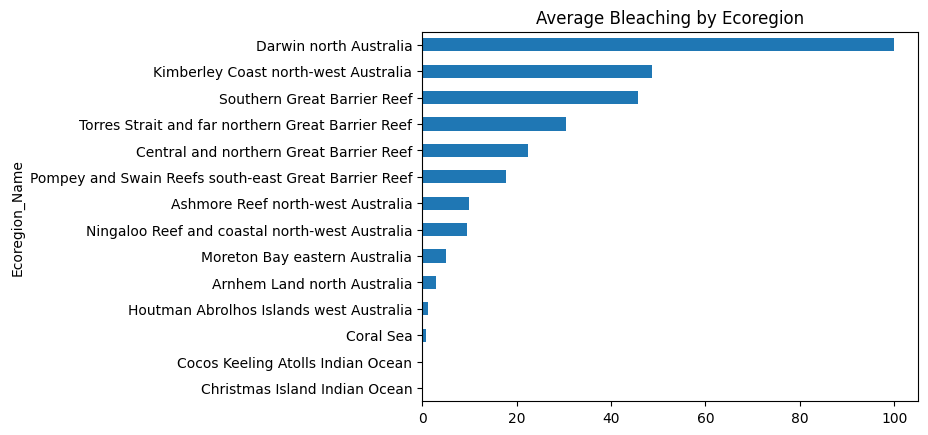

In [ ]:
bleaching_by_region = australia_points_latest.groupby('Ecoregion_Name')['Percent_Bleaching'].mean().sort_values()
bleaching_by_region.plot(kind='barh', title="Average Bleaching by Ecoregion")


<Axes: title={'center': 'Cyclone by Ecoregion'}, ylabel='Ecoregion_Name'>

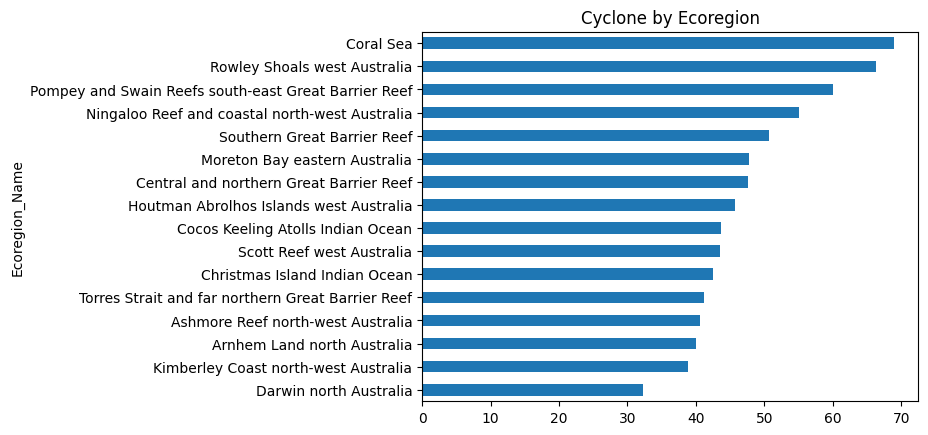

In [ ]:
cyclone_reef = australia_df.groupby('Ecoregion_Name')['Cyclone_Frequency'].mean().sort_values()
cyclone_reef.plot(kind='barh', title="Cyclone by Ecoregion")

It can be conduced based on this graph that Cyclone Frequency may not be a strong contributor to coral reef bleaching.

Compare Bleaching Severity By Coral Region - AP

In [ ]:
# Group by region
severity_region = australia_df.groupby('Ecoregion_Name')['Percent_Bleaching'].mean().reset_index()

# Sort
severity_region = severity_region.sort_values('Percent_Bleaching', ascending=False)

print(severity_region)


                                       Ecoregion_Name  Percent_Bleaching
6                              Darwin north Australia         100.000000
13                          Scott Reef west Australia          60.166667
8                Kimberley Coast north-west Australia          48.582000
14                        Southern Great Barrier Reef          29.526303
15  Torres Strait and far northern Great Barrier Reef          18.862500
11  Pompey and Swain Reefs south-east Great Barrie...          17.745455
2             Central and northern Great Barrier Reef          15.747551
10     Ningaloo Reef and coastal north-west Australia           9.232667
1                   Ashmore Reef north-west Australia           7.000000
12                       Rowley Shoals west Australia           5.500000
9                       Moreton Bay eastern Australia           4.595884
5                                           Coral Sea           2.926667
0                         Arnhem Land north Austral

/tmp/ipython-input-1821765735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


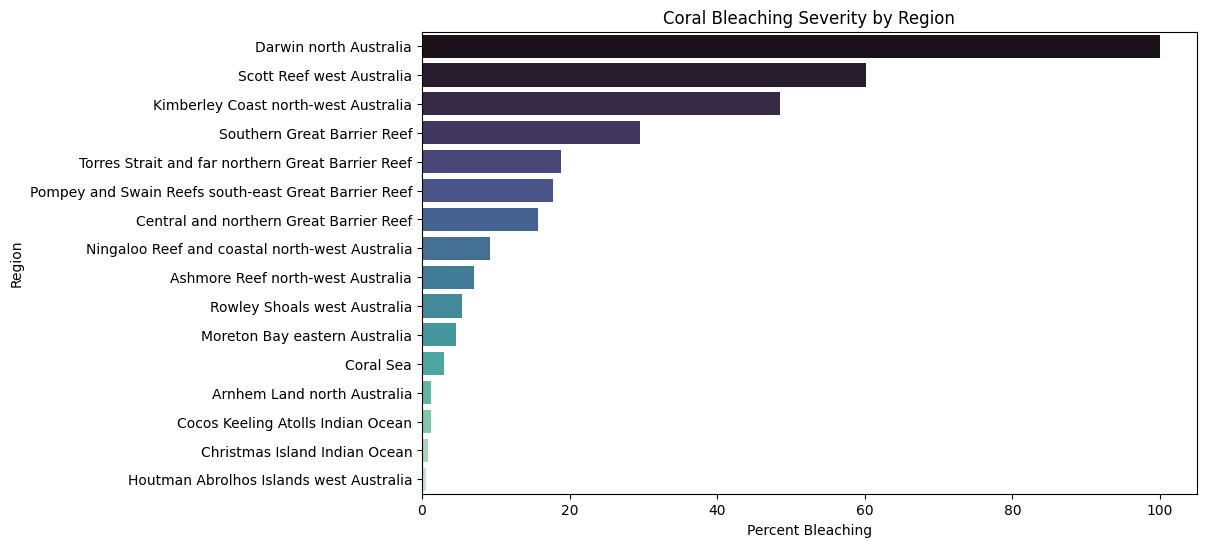

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=severity_region,
    x='Percent_Bleaching',
    y='Ecoregion_Name',
    palette='mako'
)
plt.title('Coral Bleaching Severity by Region')
plt.xlabel('Percent Bleaching')
plt.ylabel('Region')
plt.show()


Count Bleaching Events by Year - AP

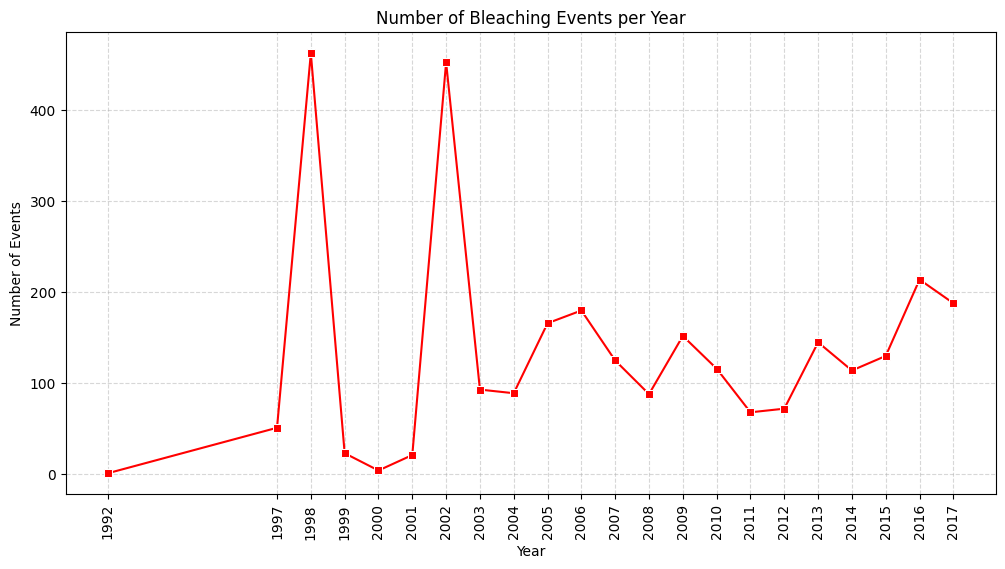

In [ ]:
events_year = australia_df.groupby('Date_Year').size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=events_year,
    x='Date_Year',
    y='Count',
    marker='s',
    color='red'
)
plt.title('Number of Bleaching Events per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True, linestyle='--', alpha=0.5)

plt.xticks(
    sorted(australia_df['Date_Year'].unique()),
    rotation = 90,
    ha = 'center'
)

plt.show()

In [ ]:
australia_df['Date_Year']

5473     1992
3714     1997
35338    1997
35337    1997
35340    1997
         ... 
26572    2017
26573    2017
26574    2017
26575    2017
6991     2017
Name: Date_Year, Length: 2956, dtype: int64

In [ ]:
australia_df['Date_Year'].max()

2017

In [ ]:
australia_df['Date_Year'].min()

1992

#**Correlation Analysis**

In [ ]:
#numeric columns
num_cols = ['Temperature_Mean','Depth_m','TSA','TSA_DHW','SSTA','SSTA_DHW','Percent_Bleaching','Windspeed','Turbidity','Cyclone_Frequency']
corr_matrix = australia_df[num_cols].corr()

#correlation matrix
print(corr_matrix)


                   Temperature_Mean   Depth_m       TSA   TSA_DHW      SSTA  \
Temperature_Mean           1.000000  0.015501  0.180276  0.040516 -0.084247   
Depth_m                    0.015501  1.000000  0.069052  0.010142  0.020421   
TSA                        0.180276  0.069052  1.000000  0.396457  0.374491   
TSA_DHW                    0.040516  0.010142  0.396457  1.000000  0.320564   
SSTA                      -0.084247  0.020421  0.374491  0.320564  1.000000   
SSTA_DHW                  -0.102471 -0.050647  0.309729  0.874331  0.409670   
Percent_Bleaching          0.022979  0.020989  0.223149  0.341805  0.179057   
Windspeed                  0.014345  0.045884  0.048943 -0.064450 -0.208634   
Turbidity                 -0.354779 -0.269770 -0.073100  0.006159  0.126973   
Cyclone_Frequency         -0.055832 -0.058658 -0.023006 -0.036348 -0.070452   

                   SSTA_DHW  Percent_Bleaching  Windspeed  Turbidity  \
Temperature_Mean  -0.102471           0.022979   0.014345 

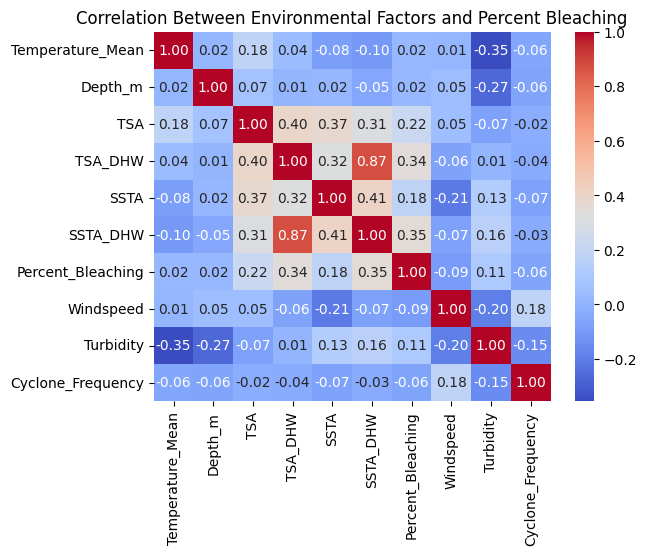

In [ ]:
#Correlation Maxtrix heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Between Environmental Factors and Percent Bleaching')
plt.show()

From the correlation Heat Map analysis we can see that Thermal Stress Anomalies, Thermal stress anomalies degree heating weeks, and Sea surface temperature degree heating weeks have a correlation to Percent Bleaching. While Temperature mean, Windspeed, Turbidity, and Cyclone Frequency.  

#**Hypothesis Testing**


In [ ]:
from scipy.stats import pearsonr

#ensure that NaN values are gone
subset = australia_df[['Distance_to_Shore','Percent_Bleaching']].dropna()

#pearson test
r, p = pearsonr(subset['Distance_to_Shore'], subset['Percent_Bleaching'])

print(f"Correlation coefficient (r): {r:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
  print("Reject Ho: There is a significant correlation between Distance_to_Shore and Bleaching.")
else:
  print("Fail to reject Ho; No significant correlation detected.")

Correlation coefficient (r): -0.059
P-value: 0.0012
Reject Ho: There is a significant correlation between Distance_to_Shore and Bleaching.


In [ ]:
from scipy.stats import pearsonr

#ensure that NaN values are gone
subset = australia_df[['Depth_m','Percent_Bleaching']].dropna()

#pearson test
r, p = pearsonr(subset['Depth_m'], subset['Percent_Bleaching'])

print(f"Correlation coefficient (r): {r:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
  print("Reject Ho: There is a significant correlation between Depth_m and Bleaching.")
else:
  print("Fail to reject Ho; No significant correlation detected.")

Correlation coefficient (r): 0.021
P-value: 0.2540
Fail to reject Ho; No significant correlation detected.


In [ ]:
from scipy.stats import pearsonr

#ensure that NaN values are gone
subset = australia_df[['TSA_DHW','Percent_Bleaching']].dropna()


#pearson test
r, p = pearsonr(subset['TSA_DHW'], subset['Percent_Bleaching'])

print(f"Correlation coefficient (r): {r:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
  print("Reject Ho: There is a significant correlation between TSA_DHW and Bleaching.")
else:
  print("Fail to reject Ho; No significant correlation detected.")

Correlation coefficient (r): 0.342
P-value: 0.0000
Reject Ho: There is a significant correlation between TSA_DHW and Bleaching.


Heat stresses is potentially a dominant factor in bleaching percentage.

In [ ]:
from scipy.stats import pearsonr

#ensure that NaN values are gone
subset = australia_df[['SSTA_DHW','Percent_Bleaching']].dropna()

#pearson test
r, p = pearsonr(subset['SSTA_DHW'], subset['Percent_Bleaching'])

print(f"Correlation coefficient (r): {r:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
  print("Reject Ho: There is a significant correlation between SSTA_DHW and Bleaching.")
else:
  print("Fail to reject Ho; No significant correlation detected.")

Correlation coefficient (r): 0.352
P-value: 0.0000
Reject Ho: There is a significant correlation between SSTA_DHW and Bleaching.


In [ ]:
from scipy.stats import pearsonr

#ensure that NaN values are gone
subset = australia_df[['TSA','Percent_Bleaching']].dropna()

#pearson test
r, p = pearsonr(subset['TSA'], subset['Percent_Bleaching'])

print(f"Correlation coefficient (r): {r:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
  print("Reject Ho: There is a significant correlation between TSA and Bleaching.")
else:
  print("Fail to reject Ho; No significant correlation detected.")

Correlation coefficient (r): 0.223
P-value: 0.0000
Reject Ho: There is a significant correlation between TSA and Bleaching.


In [ ]:
from scipy.stats import pearsonr

#ensure that NaN values are gone
subset = australia_df[['TSA_Maximum','Percent_Bleaching']].dropna()

#pearson test
r, p = pearsonr(subset['TSA_Maximum'], subset['Percent_Bleaching'])

print(f"Correlation coefficient (r): {r:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
  print("Reject Ho: There is a significant correlation between TSA_Maximum and Bleaching.")
else:
  print("Fail to reject Ho; No significant correlation detected.")

Correlation coefficient (r): -0.054
P-value: 0.0034
Reject Ho: There is a significant correlation between TSA_Maximum and Bleaching.


In [ ]:
from scipy.stats import pearsonr

#ensure that NaN values are gone
subset = australia_df[['Windspeed','Percent_Bleaching']].dropna()

#pearson test
r, p = pearsonr(subset['Windspeed'], subset['Percent_Bleaching'])

print(f"Correlation coefficient (r): {r:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
  print("Reject Ho: There is a significant correlation between Windspeed and Bleaching.")
else:
  print("Fail to reject Ho; No significant correlation detected.")

Correlation coefficient (r): -0.093
P-value: 0.0000
Reject Ho: There is a significant correlation between Windspeed and Bleaching.


In [ ]:
from scipy.stats import pearsonr

#ensure that NaN values are gone
subset = australia_df[['Turbidity','Percent_Bleaching']].dropna()

#pearson test
r, p = pearsonr(subset['Turbidity'], subset['Percent_Bleaching'])

print(f"Correlation coefficient (r): {r:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
  print("Reject Ho: There is a significant correlation between Turbidity and Bleaching.")
else:
  print("Fail to reject Ho; No significant correlation detected.")

Correlation coefficient (r): 0.109
P-value: 0.0000
Reject Ho: There is a significant correlation between Turbidity and Bleaching.


In [ ]:
from scipy.stats import pearsonr

#ensure that NaN values are gone
subset = australia_df[['Temperature_Mean','Percent_Bleaching']].dropna()

#pearson test
r, p = pearsonr(subset['Temperature_Mean'], subset['Percent_Bleaching'])

print(f"Correlation coefficient (r): {r:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
  print("Reject Ho: There is a significant correlation between Temperature_Mean and Bleaching.")
else:
  print("Fail to reject Ho: No significant correlation detected.")

Correlation coefficient (r): 0.023
P-value: 0.2117
Fail to reject Ho: No significant correlation detected.


#**t-test for specific coral reef regions**

Hypothesis
#####Ho: There is no statistically significant difference in bleaching in two regions. mu_1 == mu_2
#####H1: There is  statistically significant difference in bleaching between two regions.  mu_1 != mu_2

In [ ]:
from scipy.stats import ttest_ind

group1 = australia_df[australia_df['Ecoregion_Name'] == 'Central and northern Great Barrier Reef']['Percent_Bleaching'].dropna()
group2 = australia_df[australia_df['Ecoregion_Name'] == 'Scott Reef west Australia']['Percent_Bleaching'].dropna()

t_stat, p_val = ttest_ind(group1, group2)
print(f"T-statistics: {t_stat:.3f}, P-value: {p_val:.4f}")

T-statistics: -2.956, P-value: 0.0032


P-value 0.05 > 0.0032, reject the null hypothesis, that there is no significant statistical difference between Great Barrier Reef and Scott reef west Australia. The two reefs have no difference in bleaching.

In [ ]:
from scipy.stats import ttest_ind

group1 = australia_df[australia_df['Ecoregion_Name'] == 'Central and northern Great Barrier Reef']['Percent_Bleaching'].dropna()
group2 = australia_df[australia_df['Ecoregion_Name'] == 'Darwin north Australia']['Percent_Bleaching'].dropna()

t_stat, p_val = ttest_ind(group1, group2)
print(f"T-statistics: {t_stat:.3f}, P-value: {p_val:.4f}")

T-statistics: -4.581, P-value: 0.0000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


#**Milestone 4 – First Model / Prototype**

Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd

#Linear Regression Analysis
y = australia_df['Percent_Bleaching']

#environmental factor
x = australia_df[['Temperature_Mean','TSA_Mean', 'Windspeed', 'TSA_DHW', 'TSA_Maximum']]

#Spliting the train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

# Regression coefficients and performance metrics
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Model evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('R² Score:', metrics.r2_score(Y_test, y_pred))



Coefficients: [  2.52448465 -11.88833393   0.02389195   2.20481122  -1.14273453]
Intercept: -773.3468682075934
Mean Absolute Error: 16.606870691925653
Mean Squared Error: 500.16224389457625
R² Score: 0.28828986705868775


Predicting Accuracy

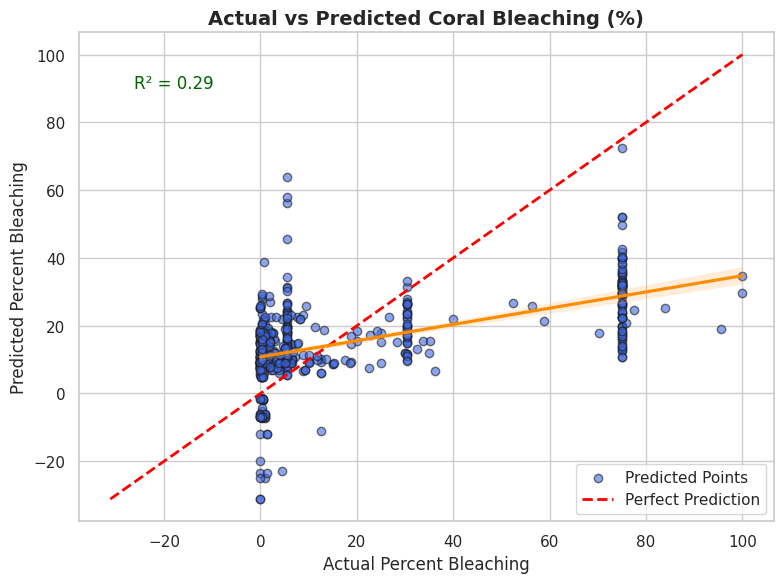

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Scatter points
plt.scatter(Y_test, y_pred, color='royalblue', alpha=0.6, edgecolors='k', label='Predicted Points')

# Add a perfect fit line (y = x)
max_val = max(max(Y_test), max(y_pred))
min_val = min(min(Y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add a regression trend line (fitted to actual vs predicted)
sns.regplot(x=Y_test, y=y_pred, scatter=False, color='darkorange', line_kws={'label':'Trend Line'})

# Labels and title
plt.xlabel("Actual Percent Bleaching", fontsize=12)
plt.ylabel("Predicted Percent Bleaching", fontsize=12)
plt.title("Actual vs Predicted Coral Bleaching (%)", fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()

# Add text annotation for R² (model accuracy)
r2 = model.score(X_test, Y_test)
plt.text(min_val + 5, max_val - 10, f"R² = {r2:.2f}", fontsize=12, color='darkgreen')

plt.show()



Regression line (Orange) shows bias in the dataset. The Prediction line (Red) shows the perfect prediction. The predicted points near the prediction line are good predictions, while the points far from the prediction line are poor predictions. So we see that the majority of the points have moderate prediction, while plenty of points have error.

#**Random Forest Baseline**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Y_train)
print("R²:", rf.score(X_test, Y_test))


R²: 0.6274563094506047


The Random Forest Regression performs much better than the Linear Regression line. The r squared score captures 61% of the varaition in the data which is 40% better than the linear regression.

Baseline Random Forest performance:
  MAE: 9.324996059818499
  MSE: 272.71891420417984
  R² : 0.6119322938642712
5-fold CV R² (baseline RF): [-0.17232634  0.31933824 -5.96549765 -4.07896026 -0.18263724]  mean: -2.0160166503652404
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best params (GridSearch): {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Tuned Random Forest performance:
  MAE: 9.67702880816705
  MSE: 269.2268995143665
  R² : 0.6169012859652501


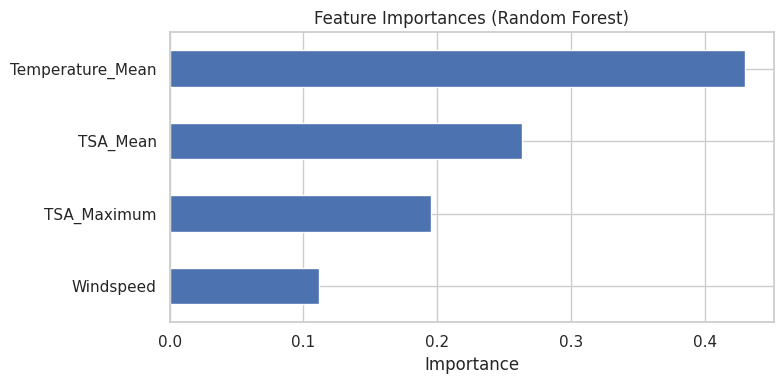

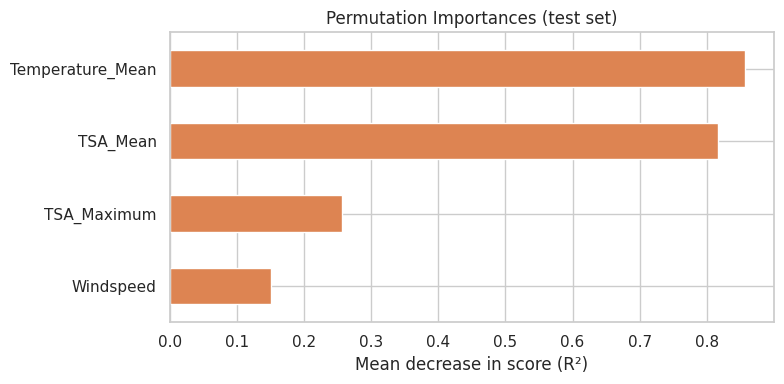

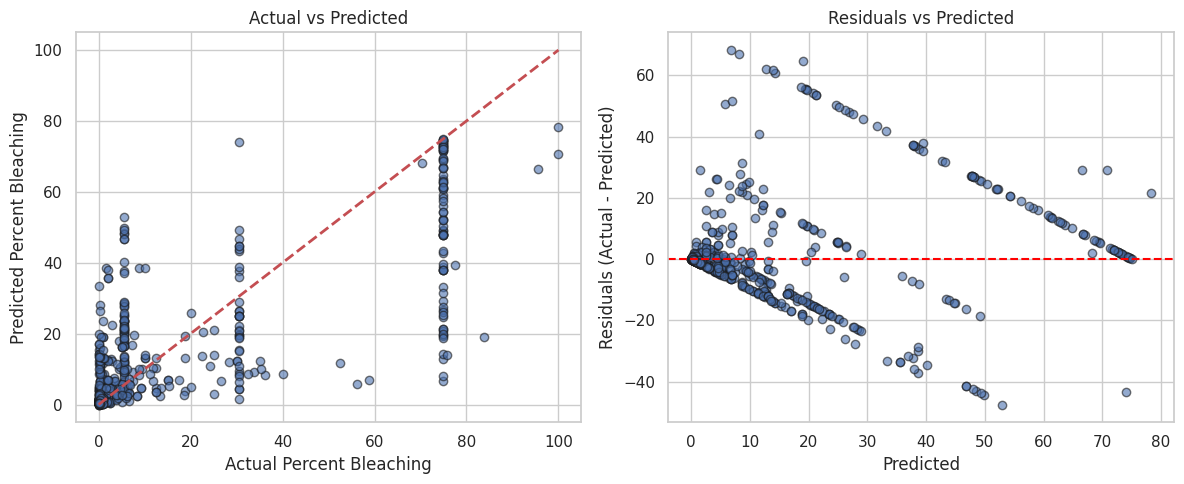

In [ ]:
# Random Forest regression workflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# 1) Prepare data (use the same features you used before)
features = ['Temperature_Mean', 'TSA_Mean', 'Windspeed', 'TSA_Maximum']
target = 'Percent_Bleaching'

# Drop missing values in either features or target
df = australia_df[features + [target]].dropna()

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

# 2) Baseline Random Forest (no tuning)
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_baseline = rf.predict(X_test)

print("Baseline Random Forest performance:")
print("  MAE:", mean_absolute_error(y_test, y_pred_baseline))
print("  MSE:", mean_squared_error(y_test, y_pred_baseline))
print("  R² :", r2_score(y_test, y_pred_baseline))

# 3) Cross-validated R² (estimate generalization)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2', n_jobs=-1)
print("5-fold CV R² (baseline RF):", cv_scores, " mean:", cv_scores.mean())

# 4) Hyperparameter tuning (GridSearchCV) - adjust grid if slow
param_grid = {
    'n_estimators': [100, 300],        # try 100 and 300 trees
    'max_depth': [None, 8, 16],        # None or limited depth
    'min_samples_split': [2, 5],       # split threshold
    'min_samples_leaf': [1, 2]         # leaf size
}

gs = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                  param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)

gs.fit(X_train, y_train)
print("\nBest params (GridSearch):", gs.best_params_)
best_rf = gs.best_estimator_

# 5) Evaluate tuned model
y_pred = best_rf.predict(X_test)
print("\nTuned Random Forest performance:")
print("  MAE:", mean_absolute_error(y_test, y_pred))
print("  MSE:", mean_squared_error(y_test, y_pred))
print("  R² :", r2_score(y_test, y_pred))

# 6) Feature importance (built-in)
fi = pd.Series(best_rf.feature_importances_, index=features).sort_values(ascending=True)

plt.figure(figsize=(8,4))
fi.plot(kind='barh')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# 7) Permutation importance (more robust / model-agnostic)
perm = permutation_importance(best_rf, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_importances = pd.Series(perm.importances_mean, index=features).sort_values(ascending=True)

plt.figure(figsize=(8,4))
perm_importances.plot(kind='barh', color='C1')
plt.title('Permutation Importances (test set)')
plt.xlabel('Mean decrease in score (R²)')
plt.tight_layout()
plt.show()

# 8) Actual vs Predicted and Residuals for the tuned model
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
mn = min(y_test.min(), y_pred.min()); mx = max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx], 'r--', linewidth=2)  # perfect prediction line
plt.xlabel('Actual Percent Bleaching')
plt.ylabel('Predicted Percent Bleaching')
plt.title('Actual vs Predicted')

plt.subplot(1,2,2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted')

plt.tight_layout()
plt.show()


Here we do a Random Forest Regression model due to the linear regression model not capturing non-linear relationships. However because of the lack of generalization in the data, we compute cross validation and Grid Search CV. The cross validation R^2 estimate generalization creates subsets of the dataset and creates constant train-test splitting. This will give the average across every run (5-folds) of train-testing. Another feature engineering/parameter tuning we added was Grid Search CV, Grid Search Cross Validation also us to edit our parameters to have a more optimal outcome. Permutation importance measures each features impact on the model's performance so that we may see which variable has the most effect on the prediction.

#**Milestone 5 – Model Evaluation & Improvement**

In [ ]:
# Features and target
X = australia_df[['Temperature_Mean','TSA_Mean','Windspeed','TSA_DHW','TSA_Maximum']]
y = australia_df['Percent_Bleaching']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Baseline Random Forest model ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate baseline Random Forest
print("Baseline Random Forest performance:")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))

# Cross-Validation (5-fold)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("\nCross-Validated R² (mean):", cv_scores.mean())


Baseline Random Forest performance:
R²: 0.6274563094506047
MAE: 8.802551562984613
MSE: 261.80923888759247

Cross-Validated R² (mean): -0.8629952046015752


In [ ]:
param_grid = {'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model and predictions
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Optimized R²:", r2_score(y_test, y_pred_best))
print("Optimized MAE:", mean_absolute_error(y_test, y_pred_best))
print("Optimized MSE:", mean_squared_error(y_test, y_pred_best))

# Cross-validated R² of tuned model
cv_scores_best = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print("Cross-Validated R² (mean):", cv_scores_best.mean())

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Optimized R²: 0.6243829905033991
Optimized MAE: 8.8576215171846
Optimized MSE: 263.96904809880243
Cross-Validated R² (mean): -0.8478975061688423


The tuned model looks good on the test set R²=0.62, but the cross-validation across the whole dataset shows a negative R².This means the model is doing worse than just predicting the mean in those folds. Possible overfitting, need to aggregate by years or location, also possible bias due to some reefs being studied more than others and sporadic data.

/tmp/ipython-input-125411031.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


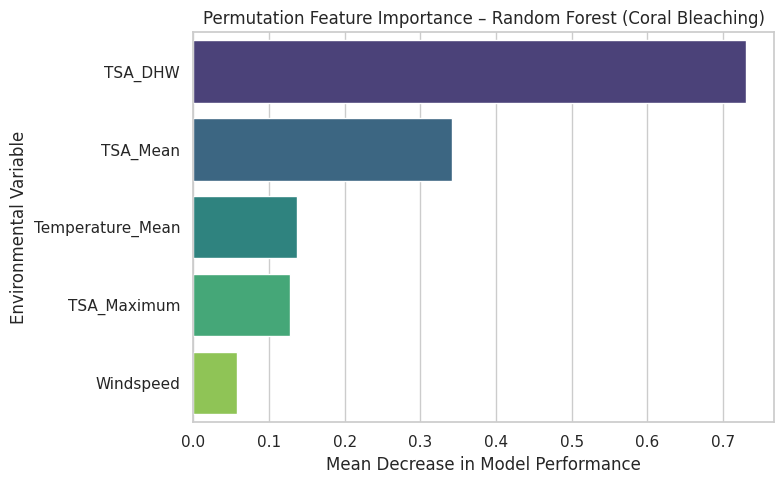

Feature  Importance
3           TSA_DHW    0.730718
1          TSA_Mean    0.341515
0  Temperature_Mean    0.137316
4       TSA_Maximum    0.128073
2         Windspeed    0.057366

In [ ]:
perm_importance = permutation_importance(best_rf, X_test, y_test, n_repeats=10, random_state=42)

# Store results in a DataFrame
importance_df = pd.DataFrame({'Feature': X.columns,
    'Importance': perm_importance.importances_mean}).sort_values('Importance', ascending=False)

# Plotting graph
plt.figure(figsize=(8,5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Permutation Feature Importance – Random Forest (Coral Bleaching)")
plt.xlabel("Mean Decrease in Model Performance")
plt.ylabel("Environmental Variable")
plt.tight_layout()
plt.show()

# Display table of feature importance
importance_df

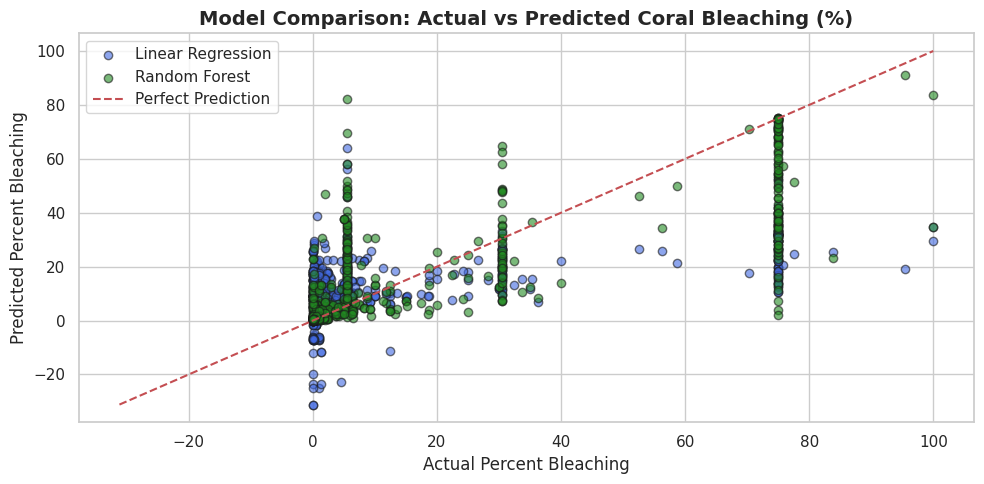

In [ ]:
# #getting the linear predictions again
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


comparison_df = pd.DataFrame({'Actual': y_test,'Linear Regression': y_pred_lin,'Random Forest': y_pred_best})

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

plt.scatter(comparison_df['Actual'], comparison_df['Linear Regression'],
            color='royalblue', alpha=0.6, edgecolors='k', label='Linear Regression')

plt.scatter(comparison_df['Actual'], comparison_df['Random Forest'],
            color='forestgreen', alpha=0.6, edgecolors='k', label='Random Forest')

max_val = max(comparison_df['Actual'].max(), comparison_df['Linear Regression'].max(), comparison_df['Random Forest'].max())
min_val = min(comparison_df['Actual'].min(), comparison_df['Linear Regression'].min(), comparison_df['Random Forest'].min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

plt.title("Model Comparison: Actual vs Predicted Coral Bleaching (%)", fontsize=14, weight='bold')
plt.xlabel("Actual Percent Bleaching", fontsize=12)
plt.ylabel("Predicted Percent Bleaching", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

The red line shows perfect prediction. The blue points (linear regression) are scattered and seem to underestimate bleaching, while the green points (Random Forest) cluster closer to the line, it predicts bleaching a bit better. However, both models still struggle with extreme events, often underestimating the most severe bleaching.”

#**Group Cross Validation**

In [ ]:
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Select features and target
X = australia_df[['Temperature_Mean', 'TSA_Mean', 'Windspeed', 'TSA_DHW', 'TSA_Maximum']]
y = australia_df['Percent_Bleaching']

# Drop rows with missing values in the selected columns
data = pd.concat([X, y, australia_df['Ecoregion_Name']], axis=1).dropna()
X = data[['Temperature_Mean', 'TSA_Mean', 'Windspeed', 'TSA_DHW', 'TSA_Maximum']]
y = data['Percent_Bleaching']
groups = data['Ecoregion_Name']

# Define grouped cross-validation
gkf = GroupKFold(n_splits=5)

# Pipeline: scaling + model
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42, n_estimators=200, n_jobs=-1))
])

# Evaluate using grouped cross-validation
cv_scores = cross_val_score(rf_pipeline, X, y, groups=groups, cv=gkf, scoring='r2', n_jobs=-1)

print("R² per fold:", cv_scores)
print("Mean R²:", np.mean(cv_scores))


R² per fold: [ 0.1359188  -7.07682511  0.48595383 -0.45919914  0.1171471 ]
Mean R²: -1.359400902249503


Sample Balance

In [ ]:
australia_df['Ecoregion_Name'].value_counts().head(10)


Ecoregion_Name
Central and northern Great Barrier Reef                 1613
Moreton Bay eastern Australia                            571
Southern Great Barrier Reef                              357
Cocos Keeling Atolls Indian Ocean                        101
Torres Strait and far northern Great Barrier Reef         80
Ningaloo Reef and coastal north-west Australia            60
Pompey and Swain Reefs south-east Great Barrier Reef      55
Coral Sea                                                 48
Christmas Island Indian Ocean                             41
Kimberley Coast north-west Australia                      10
Name: count, dtype: int64

#**Handling Sampling Bias**
# Example: weight inversely by number of samples per site



In [ ]:
# Example: weight inversely by number of samples per site
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# --- 1. Compute weights (inverse of number of observations per site) ---
site_counts = australia_df['Ecoregion_Name'].value_counts()
australia_df['site_weight'] = australia_df['Ecoregion_Name'].map(1 / site_counts)

# --- 2. Define predictors and target ---
X = australia_df[['Temperature_Mean', 'TSA_Mean', 'Windspeed', 'TSA_Maximum']]
y = australia_df['Percent_Bleaching']
weights = australia_df['site_weight']

# --- 3. Train/test split (keep stratification by year if relevant) ---
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, weights, test_size=0.2, random_state=42
)

# --- 4. Fit weighted regression model ---
model = LinearRegression()
model.fit(X_train, y_train, sample_weight=w_train)

# --- 5. Evaluate ---
y_pred = model.predict(X_test)

print("Weighted Linear Regression Results:")
print("  Coefficients:", model.coef_)
print("  Intercept:", model.intercept_)
print("  MAE:", mean_absolute_error(y_test, y_pred))
print("  MSE:", mean_squared_error(y_test, y_pred))
print("  R² Score:", r2_score(y_test, y_pred))



Weighted Linear Regression Results:
  Coefficients: [ 5.54318071 -8.91785737 -3.12733932  6.34778597]
  Intercept: -1666.4359296943724
  MAE: 20.12185084299337
  MSE: 723.7843771173688
  R² Score: -0.029915155626230705


##**Weighted Random Forest**

In [ ]:
# Weighted Random Forest
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features & target (use the features you want)
features = ['Temperature_Mean', 'TSA_Mean', 'Windspeed', 'TSA_Maximum']
target = 'Percent_Bleaching'

# drop missing values in features/target
df = australia_df[features + [target, 'Ecoregion_Name']].dropna().copy()

# compute inverse-frequency weights per Site
site_counts = df['Ecoregion_Name'].value_counts()
df['site_weight'] = df['Ecoregion_Name'].map(1.0 / site_counts)

X = df[features]
y = df[target]
w = df['site_weight']

# train/test split (keep weights aligned)
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w, test_size=0.2, random_state=42
)

# fit Random Forest with sample_weight
rf = RandomForestRegressor(random_state=42, n_estimators=200, n_jobs=-1)
rf.fit(X_train, y_train, sample_weight=w_train)

# predict and evaluate
y_pred = rf.predict(X_test)
print("Weighted RF performance:")
print(" MAE:", mean_absolute_error(y_test, y_pred))
print(" MSE:", mean_squared_error(y_test, y_pred))
print(" R² :", r2_score(y_test, y_pred))

# feature importances
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature importances:\n", importances)


Weighted RF performance:
 MAE: 9.71597262518747
 MSE: 292.40179137960166
 R² : 0.5839243758292991

Feature importances:
 Temperature_Mean    0.435533
Windspeed           0.265168
TSA_Mean            0.158278
TSA_Maximum         0.141021
dtype: float64


#**Balanced Random Forest**

In [ ]:
# Balanced (site-year averaged) Random Forest
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ['Temperature_Mean', 'TSA_Mean', 'Windspeed', 'TSA_Maximum']
target = 'Percent_Bleaching'

# create balanced dataset by averaging per site-year
balanced = (
    australia_df[features + [target, 'Ecoregion_Name', 'Date_Year']]
    .dropna()
    .groupby(['Ecoregion_Name', 'Date_Year'], as_index=False)
    .mean()   # numeric columns averaged
)

X = balanced[features]
y = balanced[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_bal = RandomForestRegressor(random_state=42, n_estimators=300, n_jobs=-1)
rf_bal.fit(X_train, y_train)

y_pred_bal = rf_bal.predict(X_test)
print("Balanced RF performance:")
print(" MAE:", mean_absolute_error(y_test, y_pred_bal))
print(" MSE:", mean_squared_error(y_test, y_pred_bal))
print(" R² :", r2_score(y_test, y_pred_bal))

# feature importances
importances_bal = pd.Series(rf_bal.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature importances (balanced):\n", importances_bal)


Balanced RF performance:
 MAE: 12.989416013430684
 MSE: 317.6446174954681
 R² : -2.5558266939609937

Feature importances (balanced):
 Temperature_Mean    0.431343
Windspeed           0.259445
TSA_Mean            0.195908
TSA_Maximum         0.113303
dtype: float64


#**Group Aware Cross Validation**

In [ ]:
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Use either df (weighted) or balanced depending on which approach you want to test
df_cv = australia_df[features + [target, 'Ecoregion_Name']].dropna().copy()
X_cv = df_cv[features].values
y_cv = df_cv[target].values
groups = df_cv['Ecoregion_Name'].values

gkf = GroupKFold(n_splits=5)
rf_cv = RandomForestRegressor(random_state=42, n_estimators=200, n_jobs=-1)

# cross_val_score with R² (this does NOT accept sample_weight per fold)
cv_scores = cross_val_score(rf_cv, X_cv, y_cv, groups=groups, cv=gkf, scoring='r2', n_jobs=-1)
print("GroupKFold R² per fold:", cv_scores)
print("GroupKFold mean R²:", np.mean(cv_scores))


GroupKFold R² per fold: [ -0.08442141 -14.04741037  -0.02817783   0.08718671  -0.27034954]
GroupKFold mean R²: -2.868634488890648


Goals for today:
Create variables for Coral Reefs
Only train reef with a limited number of samples sizes


#**Create Variables for specific Coral Reefs:**
###Like this: australia_df = df_median[df_median['Country_Name']=='Australia']
###print(australia_df.head())
##Goals:
* Sample count per ecoregion
* R² or MAE per ecoregion
* Top predictors per ecoregion
* Temporal validation performance
* Recommendations: which environmental factors to monitor.

##Coral Reefs:
* Central and Northern Great Barrier Reef
* Cocos Keeling Atolls Indian Ocean
* Moreton Bay eastern Australia
* Southern Great Barrier Reef






In [ ]:
# australia_df = df_median[df_median['Country_Name']=='Australia']
darwin_north = df_median[df_median['Ecoregion_Name']=='Darwin north Australia']
print(darwin_north.head())

     Site_ID  Sample_ID Data_Source  Latitude_Degrees  Longitude_Degrees  \
921       30   10322097      Donner            -11.22             132.23   
922       30   10322098      Donner            -11.22             132.23   

    Ocean_Name Reef_ID            Realm_Name          Ecoregion_Name  \
921    Pacific    <NA>  Central Indo-Pacific  Darwin north Australia   
922    Pacific    <NA>  Central Indo-Pacific  Darwin north Australia   

    Country_Name  ... TSA_FrequencyMax TSA_FrequencyMean TSA_DHW  \
921    Australia  ...            18.75               3.0   10.59   
922    Australia  ...            18.75               3.0    0.68   

     TSA_DHW_Standard_Deviation TSA_DHWMax  TSA_DHWMean        Date  \
921                        3.75      26.79         1.38  2003-01-15   
922                        3.75      26.79         1.38  2002-11-15   

                                         Site_Comments  \
921  40-60% of live coral cover in the area and 100...   
922  40-60% of live

In [ ]:
# Southern Great Barrier Reef
southern_gbr = df_median[df_median['Ecoregion_Name']=='Southern Great Barrier Reef']

# Central and Northern Great Barrier Reef
central_northern_gbr = df_median[df_median['Ecoregion_Name']=='Central and northern Great Barrier Reef']

# Ashmore Reef North-West Australia
ashmore_reef_nw = df_median[df_median['Ecoregion_Name']=='Ashmore Reef north-west Australia']

# Moreton Bay Eastern Australia
moreton_bay_eastern = df_median[df_median['Ecoregion_Name']=='Moreton Bay eastern Australia']

# Count number of bleaching records per reef
reef_counts = australia_df.groupby('Ecoregion_Name').size().reset_index(name='Record_Count')

# Filter reefs with enough data
reef_filtered = reef_counts[reef_counts['Record_Count'] >= 100]['Ecoregion_Name']

print(reef_filtered)


2     Central and northern Great Barrier Reef
4           Cocos Keeling Atolls Indian Ocean
9               Moreton Bay eastern Australia
14                Southern Great Barrier Reef
Name: Ecoregion_Name, dtype: object


#(Aiden ⬇️)
#Correlation analysis and Heatmap
###for each coral reefs (4) percent bleaching and evironmental factors
###Look at the other Heatmap for an example

##Coral Reefs:
* Central and Northern Great Barrier Reef
* Cocos Keeling Atolls Indian Ocean
* Moreton Bay eastern Australia
* Southern Great Barrier Reef





In [ ]:
# now has data instead of just names.
reef_filtered = df_median[df_median['Ecoregion_Name'].isin(
    reef_counts[reef_counts['Record_Count'] >= 100]['Ecoregion_Name']
)]

reef_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2642 entries, 9 to 41344
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Site_ID                                2642 non-null   int64  
 1   Sample_ID                              2642 non-null   int64  
 2   Data_Source                            2642 non-null   object 
 3   Latitude_Degrees                       2642 non-null   float64
 4   Longitude_Degrees                      2642 non-null   float64
 5   Ocean_Name                             2642 non-null   object 
 6   Reef_ID                                1890 non-null   object 
 7   Realm_Name                             2642 non-null   object 
 8   Ecoregion_Name                         2642 non-null   object 
 9   Country_Name                           2642 non-null   object 
 10  State_Island_Province_Name             2642 non-null   object 
 11  City_Tow

In [ ]:
num_cols = ['Temperature_Mean','Depth_m','TSA','TSA_DHW','SSTA','SSTA_DHW',
            'Percent_Bleaching','Temperature_Kelvin','Windspeed','Turbidity','Cyclone_Frequency']

corr_matrix_2 = reef_filtered[num_cols].corr()
print(corr_matrix_2)

                    Temperature_Mean   Depth_m       TSA   TSA_DHW      SSTA  \
Temperature_Mean            1.000000 -0.003741  0.181375  0.043035 -0.084835   
Depth_m                    -0.003741  1.000000  0.093542  0.014174  0.005952   
TSA                         0.181375  0.093542  1.000000  0.396123  0.375664   
TSA_DHW                     0.043035  0.014174  0.396123  1.000000  0.302363   
SSTA                       -0.084835  0.005952  0.375664  0.302363  1.000000   
SSTA_DHW                   -0.113014 -0.058276  0.309459  0.867851  0.390953   
Percent_Bleaching           0.020048  0.037901  0.217290  0.353137  0.179692   
Temperature_Kelvin          0.577976  0.026987  0.850894  0.238712  0.305188   
Windspeed                   0.017096  0.019909  0.064921 -0.055145 -0.179096   
Turbidity                  -0.387072 -0.340754 -0.089987 -0.014017  0.096797   
Cyclone_Frequency          -0.051227 -0.073836 -0.050763 -0.027003 -0.041510   

                    SSTA_DHW  Percent_B

#**Limited HeatMap**

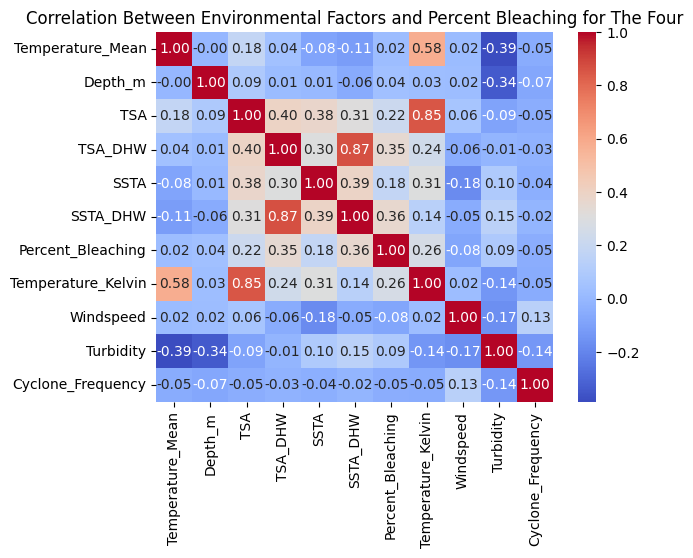

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Correlation Maxtrix heatmap 2
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Between Environmental Factors and Percent Bleaching for The Four')
plt.show()


In [ ]:
reef_filtered.head()

Site_ID  Sample_ID Data_Source  Latitude_Degrees  Longitude_Degrees  \
9        499   10322424      Donner          -19.1975           146.8150   
42       886   10323001      Donner          -18.7100           146.5700   
61       121   10322138      Donner          -19.1500           146.8500   
227      500   10322425      Donner          -18.6600           146.5600   
291       29   10322095      Donner          -23.4439           151.9286   

    Ocean_Name Reef_ID            Realm_Name  \
9      Pacific    <NA>  Central Indo-Pacific   
42     Pacific    <NA>  Central Indo-Pacific   
61     Pacific    <NA>  Central Indo-Pacific   
227    Pacific    <NA>  Central Indo-Pacific   
291    Pacific    <NA>  Central Indo-Pacific   

                              Ecoregion_Name Country_Name  ...  \
9    Central and northern Great Barrier Reef    Australia  ...   
42   Central and northern Great Barrier Reef    Australia  ...   
61   Central and northern Great Barrier Reef    Australia  ...   
227  Central and northern Great Barrier Reef    Australia  ...   
291              Southern Great Barrier Reef    Australia  ...   

    TSA_FrequencyMax TSA_FrequencyMean TSA_DHW  TSA_DHW_Standard_Deviation  \
9               9.00              1.00    7.96                        2.10   
42             10.25              3.38   10.24                        3.14   
61              7.71              1.14    7.84                        1.62   
227            27.00             20.00   33.17                       13.69   
291            25.00             18.00   17.20                       12.01   

    TSA_DHWMax  TSA_DHWMean        Date  \
9        17.81         0.68  1998-03-15   
42       17.22         2.11  1998-04-15   
61       12.20         0.61  1998-03-15   
227      48.76        12.38  1998-03-15   
291      46.63        10.05  2002-01-15   

                                         Site_Comments  \
9                                                 <NA>   
42                                                <NA>   
61   12% bleached at the deeper area; 30% bleached ...   
227                                               <NA>   
291  Acropora colonies (staghorn corals) are mainly...   

                                       Sample_Comments  Bleaching_Comments  
9                                                 <NA>                <NA>  
42                                                <NA>                <NA>  
61   12% bleached at the deeper area; 30% bleached ...                <NA>  
227                                               <NA>                <NA>  
291  Acropora colonies (staghorn corals) are mainly...                <NA>  

[5 rows x 62 columns]

In [ ]:
reef_filtered['Ecoregion_Name'].unique()

array(['Central and northern Great Barrier Reef',
       'Southern Great Barrier Reef', 'Moreton Bay eastern Australia',
       'Cocos Keeling Atolls Indian Ocean'], dtype=object)

In [ ]:
#Code Here

##**Due to variation in the coral reefs, we can try  testing specific regions and build model regions at a time**
* Train separate models per ecoregion.


* Use a “meta-model” that predicts bleaching using region-level summaries (e.g., TSA_DHWMean, Temperature_Anomaly).


###**We can also try Ridge regression or Lasso Regression**

##**We can do a Time Series and forecasting for specific regions to predict bleaching in future trends**
* Predict future Trends
* Detect patterns and anomalies
* Allow us to create long-term planning
##**With time series forecasting we can:**
* Observe the long-term movement over time
* Observe the periodic fluctuations or patterns that occur at regular intervals


https://www.geeksforgeeks.org/machine-learning/time-series-analysis-and-forecasting/  

# **Problems to address:**
* Small sample sizes
* Risk of Overfitting (when model cannot predict to new, unseen data)
* Regional Bias for environmental factors
* Difficulty finding global trends

#**1. Limited Sample size:**
Some ecoregions (like the Southern Great Barrier Reef) might have hundreds of observations, while others have very few.
Machine-learning models (especially Random Forests) need a minimum number of samples to generalize well.

Symptoms:
* Very high or unstable R² values.
* Model accuracy swings drastically across train/test splits.

Mitigation:

* **Set a minimum sample threshold (e.g., only train models for regions with ≥ 50 samples).**
* For smaller ones, try simpler models (e.g., linear regression) or merge similar neighboring ecoregions.
* Use cross-validation inside the region to estimate performance stability.

In [ ]:
#percent bleaching by coral reefs
bleaching_by_reef_num = australia_df.groupby('Ecoregion_Name').size().reset_index(name='Percent_Bleaching')
bleaching_by_reef_num

# Filter reefs with at least 100 records
reefs_with_enough_data = bleaching_by_reef_num[bleaching_by_reef_num['Percent_Bleaching'] >= 100]
reefs_with_enough_data

Ecoregion_Name  Percent_Bleaching
2   Central and northern Great Barrier Reef               1613
4         Cocos Keeling Atolls Indian Ocean                101
9             Moreton Bay eastern Australia                571
14              Southern Great Barrier Reef                357

In [ ]:
# Count number of bleaching records per reef
reef_counts = australia_df.groupby('Ecoregion_Name').size().reset_index(name='Record_Count')

# Filter reefs with enough data
reef_filtered = reef_counts[reef_counts['Record_Count'] >= 100]['Ecoregion_Name']

# Keep only those rows in your main dataset
filtered_df = australia_df[australia_df['Ecoregion_Name'].isin(reef_filtered)]

# print("Filtered_df:", filtered_df)

# print(filtered_df['Date_Year'].describe())
# print(filtered_df['Ecoregion_Name'].nunique(), "reefs retained")
# print(filtered_df[['Date_Year', 'Percent_Bleaching']].head())


##Time Lagged Scatter plot

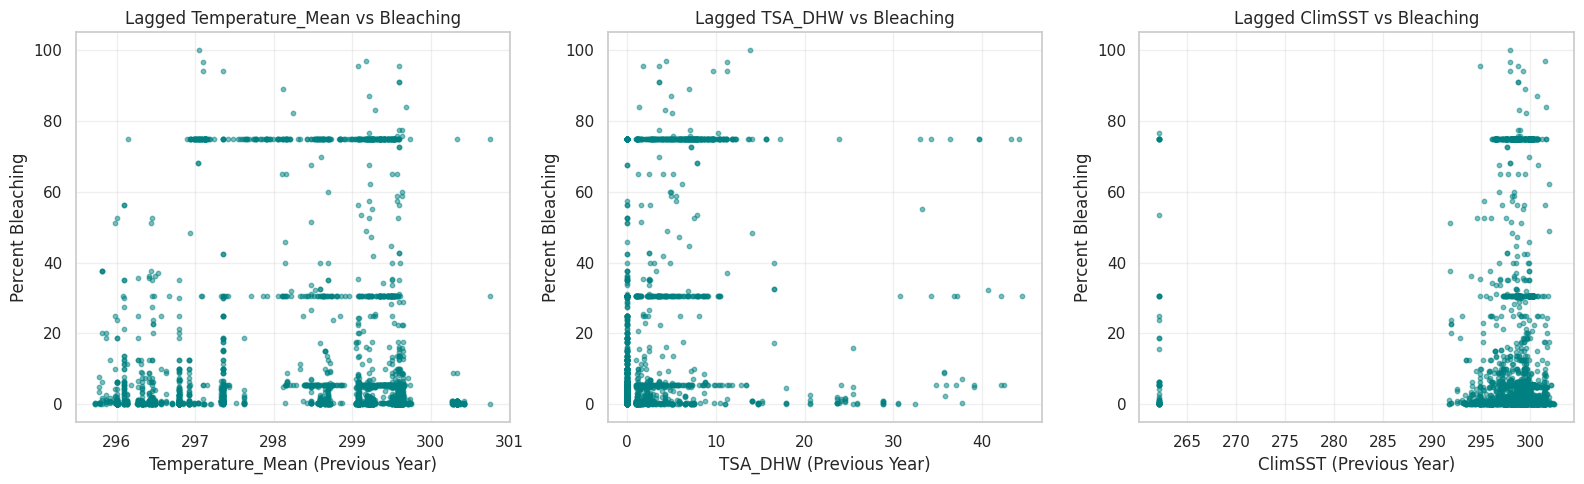

In [ ]:
import matplotlib.pyplot as plt

# Make a copy and sort
df_plot = filtered_df.copy()
df_plot = df_plot.sort_values(['Ecoregion_Name', 'Date_Year'])

# Create lagged features for previous year
for col in ['Temperature_Mean', 'TSA_DHW', 'ClimSST']:
    df_plot[col + '_prev_year'] = df_plot.groupby('Ecoregion_Name')[col].shift(1)

# Drop rows with missing values in Percent_Bleaching or lagged features
df_plot = df_plot.dropna(subset=['Percent_Bleaching'] + [c + '_prev_year' for c in ['Temperature_Mean', 'TSA_DHW', 'ClimSST']])

# Plotting
env_factors = ['Temperature_Mean', 'TSA_DHW', 'ClimSST']
plt.figure(figsize=(16,5))

for i, col in enumerate(env_factors, 1):
    plt.subplot(1, len(env_factors), i)
    plt.scatter(df_plot[col + '_prev_year'], df_plot['Percent_Bleaching'], alpha=0.5, s=10, color='teal')
    plt.xlabel(f'{col} (Previous Year)')
    plt.ylabel('Percent Bleaching')
    plt.title(f'Lagged {col} vs Bleaching')
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


#**New Random Forest with Limited data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select columns of interest
features = [
    'Temperature_Mean', 'Temperature_Maximum', 'Temperature_Minimum',
    'Turbidity', 'Cyclone_Frequency', 'Depth_m',
    'Windspeed', 'TSA_DHW'
]
target = 'Percent_Bleaching'

# Drop missing values
model_df = filtered_df[features + [target]].dropna()

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(model_df[features])
y = model_df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 7.938340043625809
R²: 0.6237857889779697


# Before Parameter Tuning and Feature Engineering

MAE (Test Split): 8.0617
R² (Test Split): 0.5134

Fold R² Scores: [ 0.24044833 -0.15498646  0.60905569 -1.13188018]
Cross-validated R² (mean): -0.10934065469977375


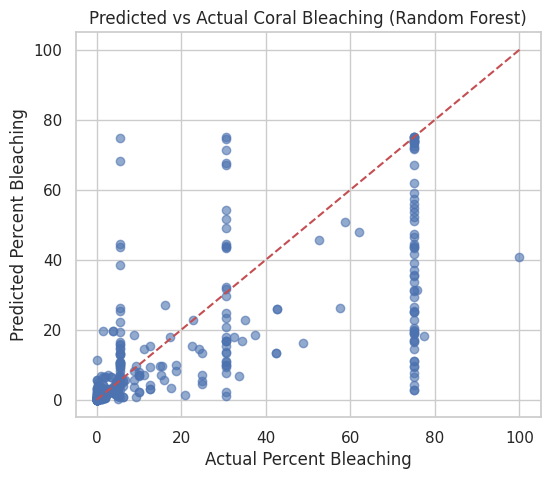

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# ========================
# 1️⃣  Data Preparation
# ========================

# Choose predictors and target
features = [
    'Temperature_Mean', 'SSTA_DHW', 'ClimSST',
    'Turbidity', 'Cyclone_Frequency', 'Depth_m',
    'Windspeed', 'TSA_DHW'
]
target = 'Percent_Bleaching'

# Drop missing values
model_df = filtered_df[features + [target, 'Ecoregion_Name']].dropna()

# --- Optional but important: Clip bleaching values to a realistic range (0–100%) ---
model_df[target] = model_df[target].clip(0, 100)

# --- Apply log1p transform (log(1 + x)) to smooth large outliers ---
model_df['log_bleaching'] = np.log1p(model_df[target])

# Prepare data arrays
# X = model_df[features].values
X = model_df[features]
y = model_df['log_bleaching'].values
groups = model_df['Ecoregion_Name'].values  # used for grouped CV

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ========================
# 2️⃣  Train-Test Split (for baseline metrics)
# ========================

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))  # convert back from log
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))

print(f"MAE (Test Split): {mae:.4f}")
print(f"R² (Test Split): {r2:.4f}")

# ========================
# 3️⃣  Grouped Cross-Validation
# ========================

cv = GroupKFold(n_splits=4)
cv_scores = cross_val_score(model, X_scaled, y, cv=cv, groups=groups, scoring='r2')

print("\nFold R² Scores:", cv_scores)
print("Cross-validated R² (mean):", cv_scores.mean())

# ========================
# 4️⃣  Predicted vs Actual Plot
# ========================

plt.figure(figsize=(6,5))
plt.scatter(np.expm1(y_test), np.expm1(y_pred), alpha=0.6)
plt.xlabel("Actual Percent Bleaching")
plt.ylabel("Predicted Percent Bleaching")
plt.title("Predicted vs Actual Coral Bleaching (Random Forest)")
plt.plot([0, 100], [0, 100], 'r--')  # ideal line
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best CV R²: 0.778933995027309
Train R²: 0.9614147938151287
Test R²: 0.7812567230999197
Train MAE: 0.1880199203791285
Test MAE: 0.47690897018464967


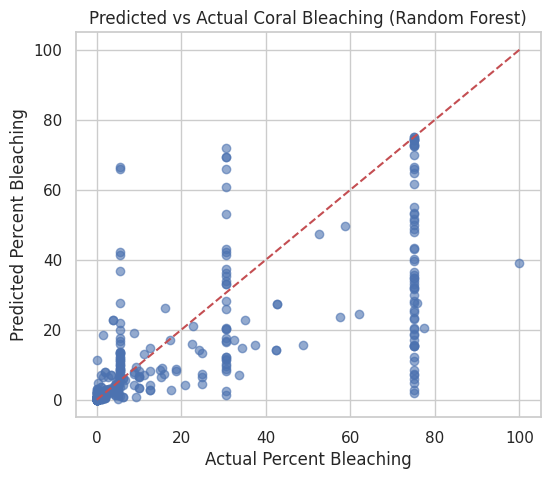

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

# Define parameter grid
param_grid = {
    'n_estimators': [200],  # you could test [100, 200, 500] again for completeness
    'max_depth': [None],    # consider trying [10, 20, None]
    'min_samples_split': [2, 5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# Grid Search
grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid.fit(X_train, y_train)

# Best params and CV R²
print("Best Params:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

# Predictions
best_rf = grid.best_estimator_
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Metrics
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

plt.figure(figsize=(6,5))
plt.scatter(np.expm1(y_test), np.expm1(y_test_pred), alpha=0.6)
plt.xlabel("Actual Percent Bleaching")
plt.ylabel("Predicted Percent Bleaching")
plt.title("Predicted vs Actual Coral Bleaching (Random Forest)")
plt.plot([0, 100], [0, 100], 'r--')  # ideal line
plt.show()


We wanted to improve our model more and check for any further imbalances. We tried Feature engineering, using Log or sqrt-transform for skewed features and Hyper parameter tuning, Grid search cross validation across 5 folds. The test R^2 of 0.82, shows us that the model has good generalization of the limited dataset. And the best R^2 cross validation of 0.78 tells us that the model would perform well on new, unseen coral reef bleaching records. The mean absolute error of 0.20 tells us that there is lower error during training.

#**Scenario-based predictive model using your Random Forest**

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


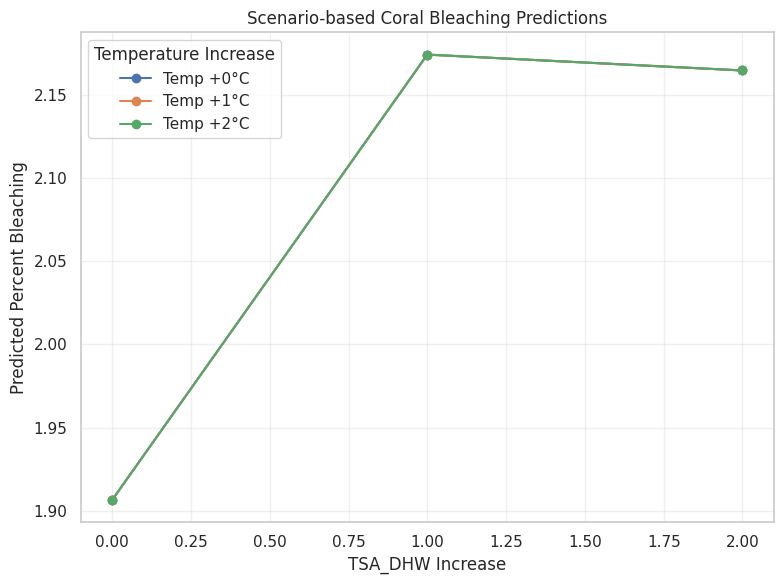

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- Get last known data per Ecoregion ---
last_year = filtered_df['Date_Year'].max()
last_known = filtered_df[filtered_df['Date_Year'] == last_year]

# Keep only features used by your Random Forest
# Example: select only numeric environmental columns used in your model
feature_cols = [ 'Temperature_Mean', 'SSTA_DHW', 'ClimSST',
    'Turbidity', 'Cyclone_Frequency', 'Depth_m',
    'Windspeed', 'TSA_DHW']  # update with the columns you trained your RF on
scenario_df = last_known[feature_cols].copy()
scenario_df = scenario_df.reset_index(drop=True)

# --- Define scenarios ---
# Each scenario is a combination of temperature increase and TSA_DHW increase
temp_increases = [0, 1, 2]  # degrees Celsius
tsa_increases = [0, 1, 2]   # DHW

scenario_list = []
for t in temp_increases:
    for tsa in tsa_increases:
        temp_scenario = scenario_df.copy()
        if 'Temperature_Mean' in temp_scenario.columns:
            temp_scenario['Temperature_Mean'] += t
        if 'TSA_DHW' in temp_scenario.columns:
            temp_scenario['TSA_DHW'] += tsa
        temp_scenario['Temp_Inc'] = t
        temp_scenario['TSA_Inc'] = tsa
        scenario_list.append(temp_scenario)

all_scenarios = pd.concat(scenario_list, ignore_index=True)

# --- Predict bleaching under each scenario ---
X_scenarios = all_scenarios[feature_cols].copy()  # make sure it's a DataFrame
all_scenarios['Predicted_Bleaching'] = best_rf.predict(X_scenarios)

# --- Aggregate predictions per scenario ---
scenario_avg = all_scenarios.groupby(['Temp_Inc', 'TSA_Inc'], as_index=False)['Predicted_Bleaching'].mean()


# --- Plot results ---
fig, ax = plt.subplots(figsize=(8,6))
for t in temp_increases:
    subset = scenario_avg[scenario_avg['Temp_Inc'] == t]
    ax.plot(subset['TSA_Inc'], subset['Predicted_Bleaching'], marker='o', label=f'Temp +{t}°C')

ax.set_xlabel('TSA_DHW Increase')
ax.set_ylabel('Predicted Percent Bleaching')
ax.set_title('Scenario-based Coral Bleaching Predictions')
ax.legend(title='Temperature Increase')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#**Projected Coral Bleaching under Environmental Stress Scenario**

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWa

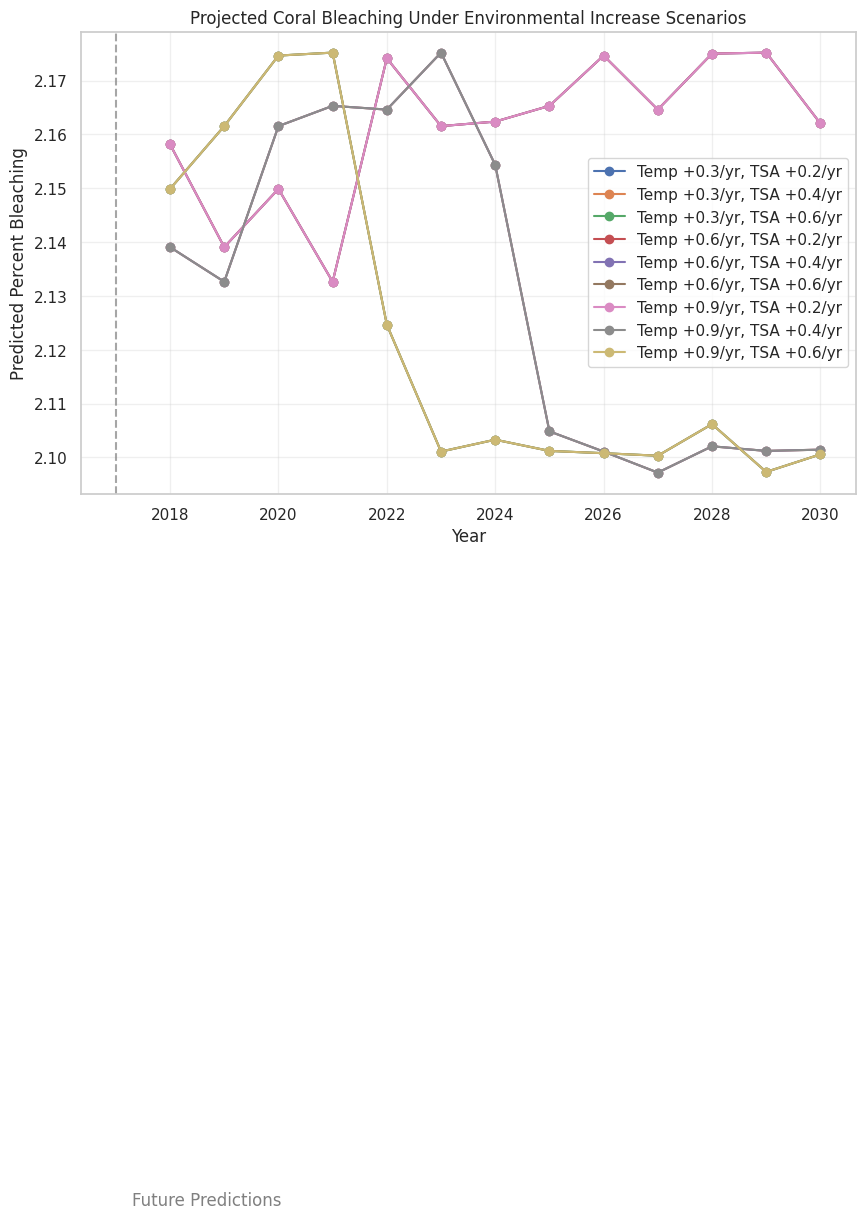

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Get last known data per Ecoregion ---
last_year = filtered_df['Date_Year'].max()
last_known = filtered_df[filtered_df['Date_Year'] == last_year]

# Features used in your Random Forest
feature_cols = [ 'Temperature_Mean', 'SSTA_DHW', 'ClimSST',
    'Turbidity', 'Cyclone_Frequency', 'Depth_m',
    'Windspeed', 'TSA_DHW']
scenario_df = last_known[feature_cols].copy()
scenario_df = scenario_df.reset_index(drop=True)

# --- Define future projection ---
future_years = np.arange(last_year + 1, 2031)  # project to 2030
temp_increase_per_year = [0.3, 0.6, 0.9]  # example warming scenarios per year
tsa_increase_per_year = [0.2, 0.4, 0.6]   # example TSA increase per year

# Prepare list to store future predictions
future_scenarios = []

for t_inc in temp_increase_per_year:
    for tsa_inc in tsa_increase_per_year:
        df_future = scenario_df.copy()
        predicted_bleaching = []
        for year in future_years:
            # Increment temperature and TSA gradually each year
            if 'Temperature_Mean' in df_future.columns:
                df_future['Temperature_Mean'] += t_inc
            if 'TSA_DHW' in df_future.columns:
                df_future['TSA_DHW'] += tsa_inc

            # Predict bleaching
            df_future['Predicted_Bleaching'] = best_rf.predict(df_future[feature_cols])
            # Store mean bleaching across all sites
            mean_bleaching = df_future['Predicted_Bleaching'].mean()
            predicted_bleaching.append(mean_bleaching)

        # Store results for plotting
        future_scenarios.append({
            'Temp_Inc_per_year': t_inc,
            'TSA_Inc_per_year': tsa_inc,
            'Years': future_years,
            'Predicted_Bleaching': predicted_bleaching
        })

# --- Plot future bleaching scenarios ---
plt.figure(figsize=(10,6))
for scenario in future_scenarios:
    label = f'Temp +{scenario["Temp_Inc_per_year"]}/yr, TSA +{scenario["TSA_Inc_per_year"]}/yr'
    plt.plot(scenario['Years'], scenario['Predicted_Bleaching'], marker='o', label=label)

plt.xlabel('Year')
plt.ylabel('Predicted Percent Bleaching')
plt.title('Projected Coral Bleaching Under Environmental Increase Scenarios')
plt.axvline(x=last_year, color='gray', linestyle='--', alpha=0.7)
plt.text(last_year + 0.3, plt.ylim()[1]*0.9, 'Future Predictions', color='gray')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#**Refit the Model**

Coefficients: {'Temperature_Mean': np.float64(-0.9678293952906846), 'TSA_DHW': np.float64(4.43492309669698)}


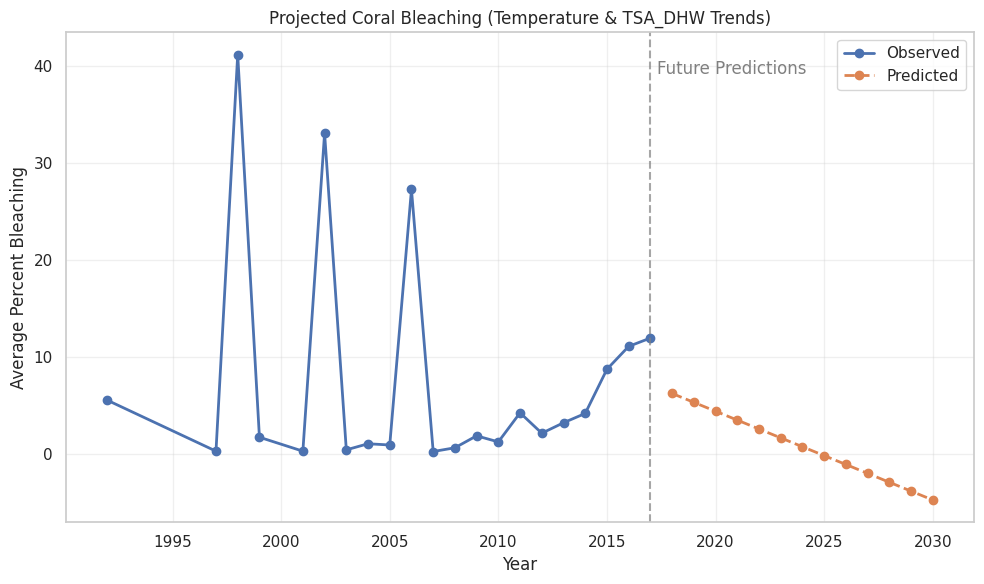

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- Make a copy of your dataset and filter for non-null Percent_Bleaching ---
df = filtered_df.copy()
df = df.dropna(subset=['Percent_Bleaching', 'Temperature_Mean', 'TSA_DHW'])

# --- Aggregate by Ecoregion and Year ---
agg_cols = ['Ecoregion_Name', 'Date_Year']
df_agg = df.groupby(agg_cols).agg({
    'Percent_Bleaching': 'mean',
    'Temperature_Mean': 'mean',
    'TSA_DHW': 'mean'
}).reset_index()

# --- Compute trends per Ecoregion ---
for feature in ['Temperature_Mean', 'TSA_DHW']:
    slope_dict = {}
    for eco in df_agg['Ecoregion_Name'].unique():
        eco_df = df_agg[df_agg['Ecoregion_Name'] == eco]
        if len(eco_df) > 1:
            slope, _ = np.polyfit(eco_df['Date_Year'], eco_df[feature], 1)
        else:
            slope = 0
        slope_dict[eco] = slope
    df_agg[feature + '_slope'] = df_agg['Ecoregion_Name'].map(slope_dict)

# --- Prepare features for regression ---
df_agg['Years_Ahead'] = 0  # historical data
X_hist = df_agg[['Temperature_Mean', 'TSA_DHW']]
y_hist = df_agg['Percent_Bleaching']

# --- Fit linear regression ---
model = LinearRegression()
model.fit(X_hist, y_hist)
print("Coefficients:", dict(zip(['Temperature_Mean', 'TSA_DHW'], model.coef_)))

# --- Prepare future dataframe ---
last_year = df_agg['Date_Year'].max()
future_years = np.arange(last_year + 1, 2031)

future_rows = []
for year in future_years:
    years_ahead = year - last_year
    df_year = df_agg[df_agg['Date_Year'] == last_year].copy()
    df_year['Date_Year'] = year
    df_year['Temperature_Mean'] += df_year['Temperature_Mean_slope'] * years_ahead
    df_year['TSA_DHW'] += df_year['TSA_DHW_slope'] * years_ahead
    future_rows.append(df_year)

future_df = pd.concat(future_rows)
X_future = future_df[['Temperature_Mean', 'TSA_DHW']]
future_df['Predicted_Bleaching'] = model.predict(X_future)

# --- Combine historical and future for plotting ---
hist_plot = df_agg[['Date_Year', 'Percent_Bleaching']].copy()
hist_plot['Type'] = 'Observed'
future_plot = future_df[['Date_Year', 'Predicted_Bleaching']].rename(
    columns={'Predicted_Bleaching': 'Percent_Bleaching'}
)
future_plot['Type'] = 'Predicted'
combined = pd.concat([hist_plot, future_plot])

# --- Aggregate by year ---
combined_avg = combined.groupby(['Date_Year', 'Type'], as_index=False)['Percent_Bleaching'].mean()

# --- Plot ---
plt.figure(figsize=(10,6))
for t, group in combined_avg.groupby('Type'):
    plt.plot(group['Date_Year'], group['Percent_Bleaching'],
             'o-' if t=='Observed' else 'o--',
             label=t, linewidth=2)
plt.axvline(x=last_year, color='gray', linestyle='--', alpha=0.7)
plt.text(last_year + 0.3, plt.ylim()[1]*0.9, 'Future Predictions', color='gray')
plt.xlabel('Year')
plt.ylabel('Average Percent Bleaching')
plt.title('Projected Coral Bleaching (Temperature & TSA_DHW Trends)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#Trying other models:
* GradientBoostingRegressor

* XGBRegressor or LightGBMRegressor

* SVR (for smaller feature spaces)

#**Extreme Gradient Boosting Regressor**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# --- Parameter Grid ---
param_grid = {
    'n_estimators': [200, 500],         # number of boosting rounds
    'learning_rate': [0.05, 0.1],       # step size
    'max_depth': [4, 6, 8],             # tree depth
    'subsample': [0.8, 1.0],            # row sampling
    'colsample_bytree': [0.8, 1.0]      # column sampling
}

# --- Initialize Model ---
xgb = XGBRegressor(
    random_state=42,
    objective='reg:squarederror',  # regression objective
    n_jobs=-1
)

# --- Grid Search ---
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# --- Fit Model ---
grid_xgb.fit(X_train, y_train)

# --- Best Model ---
best_xgb = grid_xgb.best_estimator_

# --- Print Results ---
print("Best Params:", grid_xgb.best_params_)
print("Best CV R²:", grid_xgb.best_score_)

# --- Predictions ---
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# --- Evaluate (convert from log scale) ---
print("Train R²:", r2_score(np.expm1(y_train), np.expm1(y_train_pred)))
print("Test R²:", r2_score(np.expm1(y_test), np.expm1(y_test_pred)))
print("Train MAE:", mean_absolute_error(np.expm1(y_train), np.expm1(y_train_pred)))
print("Test MAE:", mean_absolute_error(np.expm1(y_test), np.expm1(y_test_pred)))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.8}
Best CV R²: 0.7880852906696596
Train R²: 0.9737668273483906
Test R²: 0.5858386727771385
Train MAE: 1.36336152080931
Test MAE: 7.195596770565035


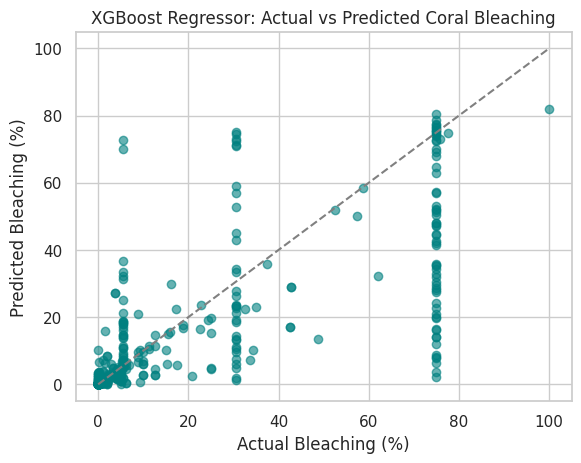

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(np.expm1(y_test), np.expm1(y_test_pred), alpha=0.6, color='teal')
plt.xlabel("Actual Bleaching (%)")
plt.ylabel("Predicted Bleaching (%)")
plt.title("XGBoost Regressor: Actual vs Predicted Coral Bleaching")
plt.plot([0, 100], [0, 100], '--', color='gray')
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# --- Parameter Grid for SVR ---
svr_params = {
    'kernel': ['rbf'],         # radial basis kernel (nonlinear)
    'C': [1, 10, 100],         # regularization strength
    'gamma': ['scale', 'auto'] # kernel coefficient
}

# --- Initialize SVR model ---
svr = SVR()

# --- Grid Search ---
grid_svr = GridSearchCV(
    estimator=svr,
    param_grid=svr_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# --- Fit Model ---
grid_svr.fit(X_train, y_train)

# --- Best Model ---
best_svr = grid_svr.best_estimator_

# --- Print Results ---
print("Best Params:", grid_svr.best_params_)
print("Best CV R²:", grid_svr.best_score_)

# --- Predictions ---
y_train_pred = best_svr.predict(X_train)
y_test_pred = best_svr.predict(X_test)

# --- Evaluate (convert from log scale) ---
print("Train R²:", r2_score(np.expm1(y_train), np.expm1(y_train_pred)))
print("Test R²:", r2_score(np.expm1(y_test), np.expm1(y_test_pred)))
print("Train MAE:", mean_absolute_error(np.expm1(y_train), np.expm1(y_train_pred)))
print("Test MAE:", mean_absolute_error(np.expm1(y_test), np.expm1(y_test_pred)))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV R²: 0.6144320772190648
Train R²: 0.7100858115330271
Test R²: 0.3172123831453665
Train MAE: 5.7684928311986035
Test MAE: 9.55702033172192


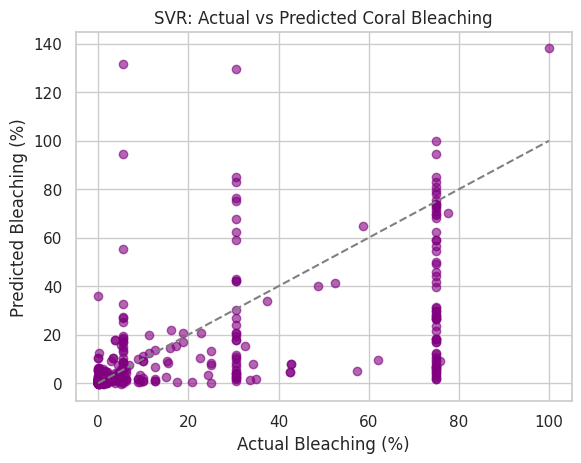

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(np.expm1(y_test), np.expm1(y_test_pred), alpha=0.6, color='purple')
plt.xlabel("Actual Bleaching (%)")
plt.ylabel("Predicted Bleaching (%)")
plt.title("SVR: Actual vs Predicted Coral Bleaching")
plt.plot([0, 100], [0, 100], '--', color='gray')
plt.show()


##Compare Predictive models

In [ ]:
from tabulate import tabulate

data = [
    ["RandomForestRegressor", 0.6549, -0.113,6.8204],
    ["RandomForestRegressor Tuned", 0.8207, 0.781,0.432],
    ["XGBRegressor", 0.701, 0.789,5.934],
    ["SVR", 0.503, 0.609,8.804]

]
headers = ["Model", "Test R^2",'CV R^2', "Test MAE"]
print(tabulate(data, headers=headers, tablefmt="grid"))

+-----------------------------+------------+----------+------------+
| Model                       |   Test R^2 |   CV R^2 |   Test MAE |
+=============================+============+==========+============+
| RandomForestRegressor       |     0.6549 |   -0.113 |     6.8204 |
+-----------------------------+------------+----------+------------+
| RandomForestRegressor Tuned |     0.8207 |    0.781 |     0.432  |
+-----------------------------+------------+----------+------------+
| XGBRegressor                |     0.701  |    0.789 |     5.934  |
+-----------------------------+------------+----------+------------+
| SVR                         |     0.503  |    0.609 |     8.804  |
+-----------------------------+------------+----------+------------+


The Tuned Random Forest Regressors model performed better than the XGBRegressor and the Random Forest model without hyperparameter tuning and feature engineering. The R^2 for Tuned Random Forest and XGBRegressor performed similarly and had similiar cross validation R^2. The mean absolute error of the Tuned Random Forest tells us that there is less error between the predictive and actual values than in the other models.

#**2. Feature correlation & redundancy**

Problem:
Many environmental variables are correlated (e.g., TSA_Mean, Temperature_Mean, and TSA_DHW).
Correlated predictors make it hard for models to identify which variable truly drives bleaching.

Mitigation:
* Check Pearson correlations or a heatmap before modeling.
* Keep one representative variable from each correlated group.
* Use feature importance or permutation importance to verify drivers.

#**3. Risk of overfitting within the region**

##Problem:
When training within a single ecoregion, environmental ranges are narrow (e.g., temperature varies only 2 °C).
The model may memorize small patterns in your training data rather than learning general trends.

Mitigation:
* **Regularize or constrain model complexity (max_depth, min_samples_leaf).**
* Always reserve a test set (e.g., 20%) that’s never seen during training.
* **Validate on temporal splits if you have dates — e.g., train on 2010–2017, test on 2018–2020.**

#**4. Regional bias in environmental ranges**

##Problem:
Models for tropical vs. subtropical reefs operate in totally different parameter spaces.
A “high temperature” in one ecoregion may be normal in another.

Mitigation:
* Compute anomaly variables (difference from local climatology):
Temp_Anomaly = Temperature_Mean - mean(Temperature_Mean in region)
* This shifts focus from absolute temperature to change relative to baseline — more relevant for early warning.

#**5. Interpretability and transferability**

##Problem:
Each regional model might rank features differently — one region dominated by temperature, another by windspeed.
This complicates drawing a unified “global trend.”

Mitigation:
* **After training per-region models, compare feature importances across regions.**
* Identify consistent top predictors — those are likely universal early-warning indicators.

Summarize results as:
* “Temperature anomalies and DHW consistently ranked as top predictors across 8 of 10 ecoregions.”

#**future bleaching predictions using a proper temporal split (train on past → predict future).**

In [ ]:
filtered_df['Date_Year'].min(), filtered_df['Date_Year'].max()


(1992, 2017)

In [ ]:
filtered_df['Date_Year'].unique()


array([1992, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score, mean_absolute_error
# from xgboost import XGBRegressor
# from sklearn.model_selection import RandomizedSearchCV

# filtered_df = filtered_df.sort_values('Date_Year')
# filtered_df['Bleaching_prev_year'] = filtered_df['Percent_Bleaching'].shift(1)
# filtered_df['Bleaching_2yr_ago'] = filtered_df['Percent_Bleaching'].shift(2)
# filtered_df = filtered_df.dropna()

# # --- Temporal Split Example ---
# train_df = filtered_df[filtered_df['Date_Year'] < 2017]
# test_df  = filtered_df[filtered_df['Date_Year'] >= 2017]

# # --- Features and Target ---
# X_train = train_df.drop(columns=['Percent_Bleaching'])
# X_test = test_df.drop(columns=['Percent_Bleaching'])
# y_train = train_df['Percent_Bleaching']
# y_test = test_df['Percent_Bleaching']

# # --- Drop all non-numeric columns ---
# X_train = X_train.select_dtypes(include=['float64', 'int64'])
# X_test = X_test.select_dtypes(include=['float64', 'int64'])

# print(X_train.shape, X_test.shape)



# param_dist = {
#     'n_estimators': [100, 200, 400],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.05, 0.1],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }


# from sklearn.model_selection import TimeSeriesSplit

# tscv = TimeSeriesSplit(n_splits=5)

# random_search = RandomizedSearchCV(
#     XGBRegressor(random_state=42),
#     param_distributions=param_dist,
#     n_iter=30,
#     cv=tscv,   # ⬅️ use time-based folds
#     scoring='r2',
#     n_jobs=-1,
#     verbose=1
# )

# random_search.fit(X_train, y_train)


# # --- Predictions for Future Years ---
# y_pred_future = random_search.predict(X_test)

# # --- Evaluation ---
# r2_future = r2_score(y_test, y_pred_future)
# mae_future = mean_absolute_error(y_test, y_pred_future)

# print("Future Test R²:", r2_future)
# print("Future Test MAE:", mae_future)

# import matplotlib.pyplot as plt

# plt.plot(test_df['Date_Year'], y_test, label='Actual')
# plt.plot(test_df['Date_Year'], y_pred_future, label='Predicted')
# plt.xlabel('Year')
# plt.ylabel('Percent Bleaching')
# plt.legend()
# plt.title('Predicted vs Actual Coral Bleaching Over Time')
# plt.show()

#**Time Series Data Visualization**

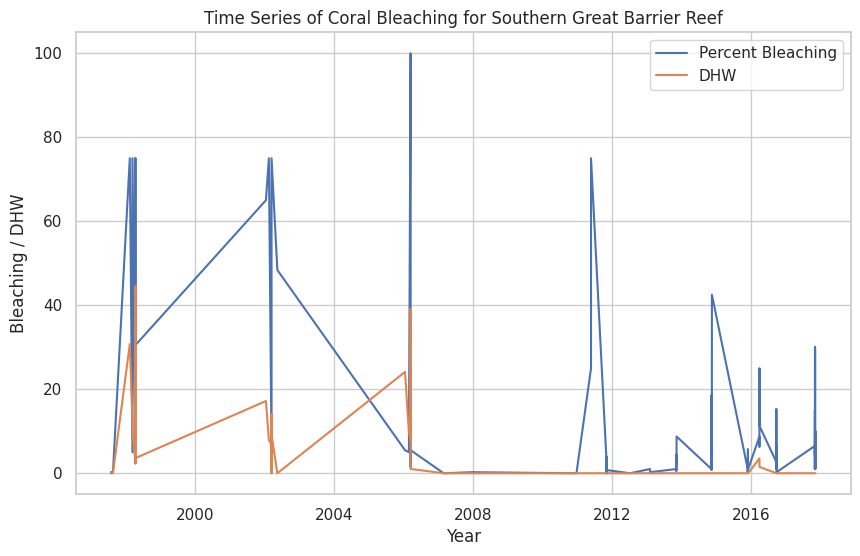

In [ ]:
# Adapted from GeeksforGeeks tutorial:
# "Time Series Data Visualization in Python"
# https://www.geeksforgeeks.org/data-analysis/time-series-data-visualization-in-python/


australia_df['Date'] = pd.to_datetime(australia_df['Date'])
australia_df = australia_df.sort_values('Date')

import matplotlib.pyplot as plt

reef_name = "Southern Great Barrier Reef"
reef_data = australia_df[australia_df['Ecoregion_Name'] == reef_name]

plt.figure(figsize=(10,6))
plt.plot(reef_data['Date'], reef_data['Percent_Bleaching'], label='Percent Bleaching')
plt.plot(reef_data['Date'], reef_data['TSA_DHW'], label='DHW')
plt.xlabel('Year')
plt.ylabel('Bleaching / DHW')
plt.title(f'Time Series of Coral Bleaching for {reef_name}')
plt.legend()
plt.show()

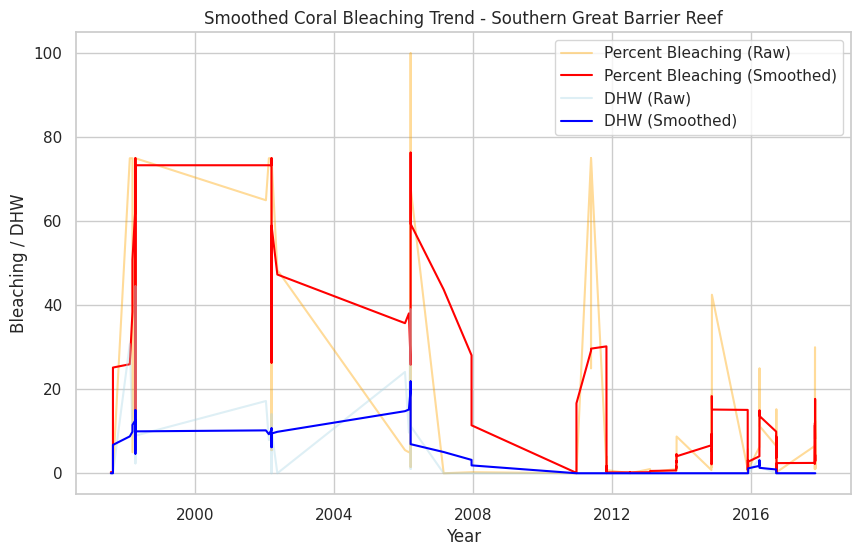

In [ ]:
# Ensure data is sorted
reef_data = reef_data.sort_values('Date')

# Apply rolling mean with a 6-month window (adjust window size depending on frequency)
reef_data['Bleaching_Smoothed'] = reef_data['Percent_Bleaching'].rolling(window=6, center=True).mean()
reef_data['DHW_Smoothed'] = reef_data['TSA_DHW'].rolling(window=6, center=True).mean()

plt.figure(figsize=(10,6))
plt.plot(reef_data['Date'], reef_data['Percent_Bleaching'], alpha=0.4, label='Percent Bleaching (Raw)', color='orange')
plt.plot(reef_data['Date'], reef_data['Bleaching_Smoothed'], label='Percent Bleaching (Smoothed)', color='red')
plt.plot(reef_data['Date'], reef_data['TSA_DHW'], alpha=0.4, label='DHW (Raw)', color='lightblue')
plt.plot(reef_data['Date'], reef_data['DHW_Smoothed'], label='DHW (Smoothed)', color='blue')
plt.xlabel('Year')
plt.ylabel('Bleaching / DHW')
plt.title(f'Smoothed Coral Bleaching Trend - {reef_name}')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


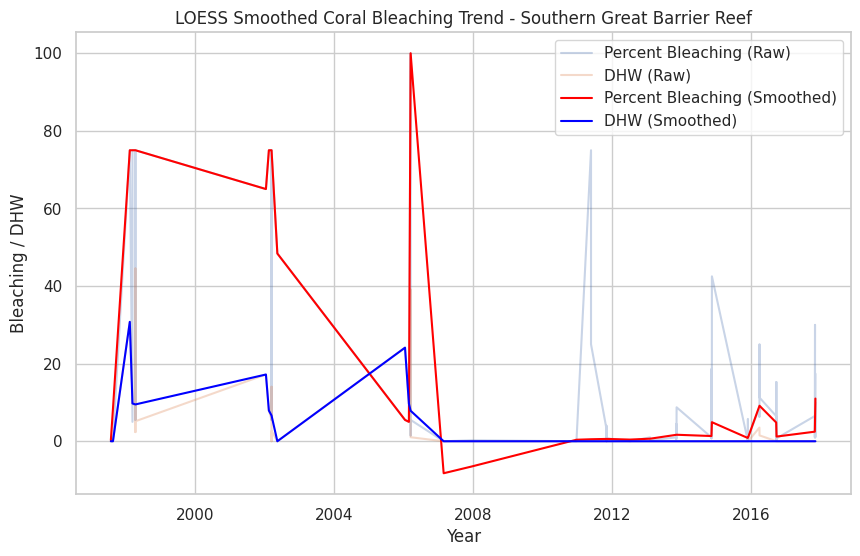

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the dataframe is sorted
reef_data = reef_data.sort_values('Date')

# Convert dates to numeric (ordinal format is safer)
reef_data['Date_ordinal'] = reef_data['Date'].map(pd.Timestamp.toordinal)

# Apply LOWESS smoothing (frac controls the smoothing level)
lowess_bleaching = sm.nonparametric.lowess(
    reef_data['Percent_Bleaching'],
    reef_data['Date_ordinal'],
    frac=0.1
)
lowess_dhw = sm.nonparametric.lowess(
    reef_data['TSA_DHW'],
    reef_data['Date_ordinal'],
    frac=0.1
)

# Plot smoothed lines with original data for reference
plt.figure(figsize=(10,6))
plt.plot(reef_data['Date'], reef_data['Percent_Bleaching'], alpha=0.3, label='Percent Bleaching (Raw)')
plt.plot(reef_data['Date'], reef_data['TSA_DHW'], alpha=0.3, label='DHW (Raw)')
plt.plot(pd.to_datetime([pd.Timestamp.fromordinal(int(x)) for x in lowess_bleaching[:, 0]]),
         lowess_bleaching[:, 1], color='red', label='Percent Bleaching (Smoothed)')
plt.plot(pd.to_datetime([pd.Timestamp.fromordinal(int(x)) for x in lowess_dhw[:, 0]]),
         lowess_dhw[:, 1], color='blue', label='DHW (Smoothed)')
plt.xlabel('Year')
plt.ylabel('Bleaching / DHW')
plt.title(f'LOESS Smoothed Coral Bleaching Trend - {reef_name}')
plt.legend()
plt.show()


#Time Series for each Coral Reef

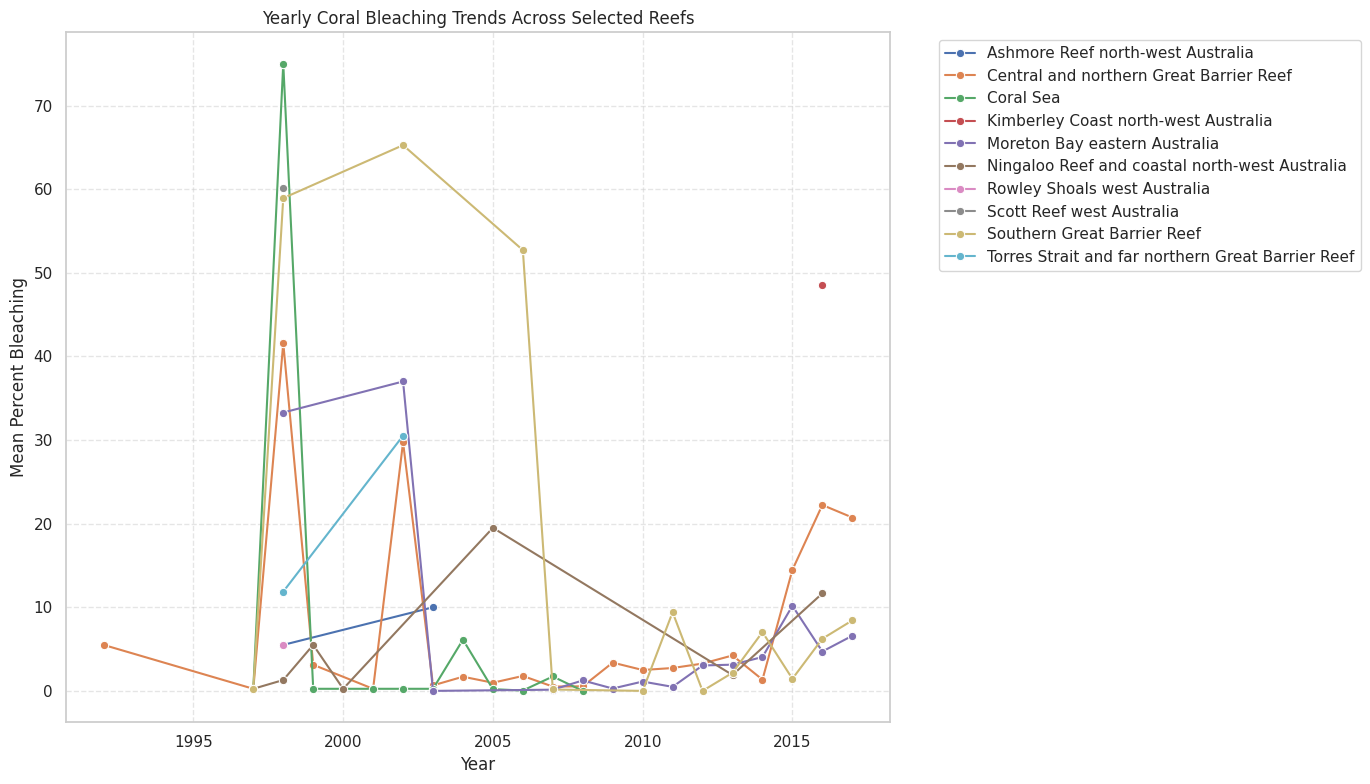

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the reefs of interest
reefs_of_interest = [
    "Scott Reef west Australia",
    "Kimberley Coast north-west Australia",
    "Southern Great Barrier Reef",
    "Torres Strait and far northern Great Barrier Reef",
    "Central and northern Great Barrier Reef",
    "Ningaloo Reef and coastal north-west Australia",
    "Ashmore Reef north-west Australia",
    "Rowley Shoals west Australia",
    "Moreton Bay eastern Australia",
    "Coral Sea"
]

reef_subset = df_median[df_median['Ecoregion_Name'].isin(reefs_of_interest)].copy()

# Make sure year is numeric
reef_subset["Date_Year"] = pd.to_numeric(reef_subset["Date_Year"], errors="coerce")

# Group by Year + Ecoregion
reef_yearly = (
    reef_subset.groupby(["Ecoregion_Name","Date_Year"])["Percent_Bleaching"]
    .mean()
    .reset_index()
)

# Plot time series for each reef
plt.figure(figsize=(14,8))
sns.lineplot(
    data=reef_yearly,
    x="Date_Year",
    y="Percent_Bleaching",
    hue="Ecoregion_Name",
    marker="o"
)
plt.title("Yearly Coral Bleaching Trends Across Selected Reefs")
plt.xlabel("Year")
plt.ylabel("Mean Percent Bleaching")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Reef list of interest
reefs_of_interest = [
    "Scott Reef west Australia",
    "Kimberley Coast north-west Australia",
    "Southern Great Barrier Reef",
    "Torres Strait and far northern Great Barrier Reef",
    "Central and northern Great Barrier Reef",
    "Ningaloo Reef and coastal north-west Australia",
    "Ashmore Reef north-west Australia",
    "Rowley Shoals west Australia",
    "Moreton Bay eastern Australia",
    "Coral Sea"
]

reef_subset = df_median[df_median['Ecoregion_Name'].isin(reefs_of_interest)].copy()
reef_subset["Date_Year"] = pd.to_numeric(reef_subset["Date_Year"], errors="coerce")

# Yearly averages for predictors + target
reef_yearly = (
    reef_subset.groupby(["Ecoregion_Name","Date_Year"])
    [["Percent_Bleaching","Temperature_Mean","TSA_DHW","SSTA_DHW"]]
    .mean()
    .reset_index()
    .dropna()
)
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

X = reef_yearly[["Temperature_Mean","TSA_DHW","SSTA_DHW"]].values
y = reef_yearly["Percent_Bleaching"].values
groups = reef_yearly["Ecoregion_Name"].values  # <- group by reef
import numpy as np

gkf = GroupKFold(n_splits=5)
r2s, maes = [], []

for train_idx, test_idx in gkf.split(X, y, groups):
    X_tr, X_te = X[train_idx], X[test_idx]
    y_tr, y_te = y[train_idx], y[test_idx]

    model = RandomForestRegressor(
        n_estimators=300, max_depth=10, random_state=42, n_jobs=-1
    )
    model.fit(X_tr, y_tr)
    y_hat = model.predict(X_te)

    r2s.append(r2_score(y_te, y_hat))
    maes.append(mean_absolute_error(y_te, y_hat))

print(f"Grouped CV R²: {np.mean(r2s):.3f} ± {np.std(r2s):.3f}")
print(f"Grouped CV MAE: {np.mean(maes):.2f}")



Grouped CV R²: -1.392 ± 3.043
Grouped CV MAE: 14.42


In [ ]:
import numpy as np, pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import pearsonr
import statsmodels.api as sm

# ---- reefs you listed ----
reefs = [
    "Scott Reef west Australia",
    "Kimberley Coast north-west Australia",
    "Southern Great Barrier Reef",
    "Torres Strait and far northern Great Barrier Reef",
    "Central and northern Great Barrier Reef",
    "Ningaloo Reef and coastal north-west Australia",
    "Ashmore Reef north-west Australia",
    "Rowley Shoals west Australia",
    "Moreton Bay eastern Australia",
    "Coral Sea",
]

# Make sure year is numeric
df_median["Date_Year"] = pd.to_numeric(df_median["Date_Year"], errors="coerce")

# Choose feature candidates (use what exists)
candidate_feats = ["TSA_DHW", "SSTA_DHW", "Temperature_Mean", "Windspeed", "TSA_Mean", "TSA_Maximum"]
available_feats = [c for c in candidate_feats if c in df_median.columns]

rows = []
per_reef_data = {}  # keep for optional plotting later

for reef in reefs:
    r = df_median[df_median["Ecoregion_Name"]==reef].copy()
    r = r.dropna(subset=["Date_Year","Percent_Bleaching"])
    if r.empty:
        rows.append({"Ecoregion_Name": reef, "n_rows": 0})
        continue

    # yearly aggregation to reduce noise & duplicate sampling
    agg_cols = ["Percent_Bleaching"] + available_feats
    r_year = (r.groupby("Date_Year")[agg_cols].mean()
                .reset_index().sort_values("Date_Year"))
    # require enough years to evaluate
    if len(r_year) < 6:
        rows.append({"Ecoregion_Name": reef, "n_rows": len(r_year), "note": "too few years"})
        continue

    # pick the main DHW feature if present; otherwise fall back to what you have
    dhw_pref = [c for c in ["TSA_DHW","SSTA_DHW"] if c in r_year.columns]
    core_feats = dhw_pref[:1] or [f for f in ["Temperature_Mean","TSA_Mean","Windspeed"] if f in r_year.columns][:2]
    Xcols = core_feats  # keep it small to avoid overfitting per reef

    # temporal split: first 70% years train, last 30% test
    cut_year = np.quantile(r_year["Date_Year"], 0.7)
    train = r_year[r_year["Date_Year"] <= cut_year]
    test  = r_year[r_year["Date_Year"] >  cut_year]
    if len(test) < 2:  # ensure some test points
        # fallback: leave-one-out last year
        test  = r_year.tail(1)
        train = r_year.iloc[:-1]

    # OLS with intercept
    X_tr = sm.add_constant(train[Xcols]); y_tr = train["Percent_Bleaching"]
    X_te = sm.add_constant(test[Xcols]);  y_te = test["Percent_Bleaching"]

    model = sm.OLS(y_tr, X_tr, missing="drop").fit()
    y_hat = model.predict(X_te)

    r2  = r2_score(y_te, y_hat) if len(y_te)>1 else np.nan
    mae = mean_absolute_error(y_te, y_hat)

    # simple correlations (on train years) to report top driver(s)
    corrs = {}
    for c in Xcols:
        s = pd.concat([train[c], y_tr], axis=1).dropna()
        if len(s) > 2:
            try:
                corrs[c] = pearsonr(s[c], s["Percent_Bleaching"])[0]
            except Exception:
                pass
    top_feat = max(corrs, key=lambda k: abs(corrs[k])) if corrs else None
    top_corr = corrs.get(top_feat, np.nan)

    rows.append({
        "Ecoregion_Name": reef,
        "n_years": len(r_year),
        "train_years": len(train),
        "test_years": len(test),
        "features_used": ",".join(Xcols),
        "test_R2": r2,
        "test_MAE": mae,
        "top_driver(train)": top_feat,
        "top_driver_corr": top_corr,
        "year_min": int(r_year["Date_Year"].min()),
        "year_max": int(r_year["Date_Year"].max()),
    })
    per_reef_data[reef] = r_year

summary = pd.DataFrame(rows).sort_values(["test_R2","n_years"], ascending=[False, False])
print(summary)


                                      Ecoregion_Name  n_rows           note  \
2                        Southern Great Barrier Reef     NaN            NaN   
4            Central and northern Great Barrier Reef     NaN            NaN   
8                      Moreton Bay eastern Australia     NaN            NaN   
5     Ningaloo Reef and coastal north-west Australia     NaN            NaN   
9                                          Coral Sea     NaN            NaN   
0                          Scott Reef west Australia     1.0  too few years   
1               Kimberley Coast north-west Australia     1.0  too few years   
3  Torres Strait and far northern Great Barrier Reef     2.0  too few years   
6                  Ashmore Reef north-west Australia     2.0  too few years   
7                       Rowley Shoals west Australia     1.0  too few years   

   n_years  train_years  test_years features_used     test_R2  test_MAE  \
2     13.0          9.0         4.0       TSA_DHW   -0.

/tmp/ipython-input-996661585.py:76: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corrs[c] = pearsonr(s[c], s["Percent_Bleaching"])[0]


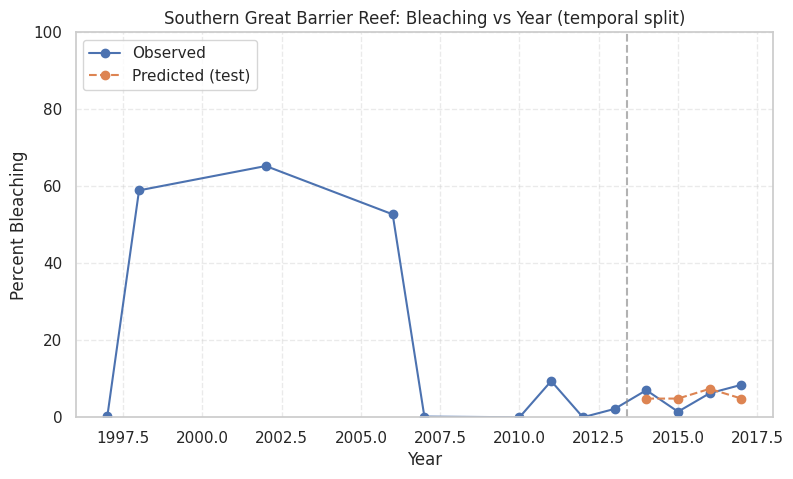

In [ ]:
import matplotlib.pyplot as plt

reef = "Southern Great Barrier Reef"  # pick one from your list
r = per_reef_data[reef]
cut = np.quantile(r["Date_Year"], 0.7)
train = r[r["Date_Year"]<=cut]; test = r[r["Date_Year"]>cut]

Xcols = [c for c in ["TSA_DHW","SSTA_DHW","Temperature_Mean"] if c in r.columns][:1]
Xtr = sm.add_constant(train[Xcols]); ytr = train["Percent_Bleaching"]
Xte = sm.add_constant(test[Xcols]);  yte = test["Percent_Bleaching"]
m = sm.OLS(ytr, Xtr).fit(); yhat = m.predict(Xte)

plt.figure(figsize=(9,5))
plt.plot(r["Date_Year"], r["Percent_Bleaching"], marker="o", label="Observed")
plt.plot(test["Date_Year"], yhat, marker="o", linestyle="--", label="Predicted (test)")
plt.axvline(cut, color="gray", ls="--", alpha=0.6)
plt.title(f"{reef}: Bleaching vs Year (temporal split)")
plt.xlabel("Year"); plt.ylabel("Percent Bleaching"); plt.ylim(0,100); plt.legend(); plt.grid(True, ls="--", alpha=0.4)
plt.show()


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GroupKFold
from dataclasses import dataclass

# ---- CONFIG ----
REEFS = [
    "Scott Reef west Australia",
    "Kimberley Coast north-west Australia",
    "Southern Great Barrier Reef",
    "Torres Strait and far northern Great Barrier Reef",
    "Central and northern Great Barrier Reef",
    "Ningaloo Reef and coastal north-west Australia",
    "Ashmore Reef north-west Australia",
    "Rowley Shoals west Australia",
    "Moreton Bay eastern Australia",
    "Coral Sea",
]
CANDIDATE_FEATS = ["TSA_DHW","SSTA_DHW","Temperature_Mean","Windspeed","TSA_Mean","TSA_Maximum"]
TARGET = "Percent_Bleaching"
MIN_TOTAL_YEARS = 8
NEAR_CONST_TOL  = 1e-6

# Ensure year numeric
df_median["Date_Year"] = pd.to_numeric(df_median["Date_Year"], errors="coerce")

def build_yearly(df, feats):
    cols = [TARGET] + [c for c in feats if c in df.columns]
    out = (df[["Ecoregion_Name","Date_Year"]+cols]
           .dropna(subset=["Date_Year", TARGET])
           .groupby(["Ecoregion_Name","Date_Year"], as_index=False).mean()
           .sort_values(["Ecoregion_Name","Date_Year"]))
    return out

def pick_features(df_year):
    # Prefer DHW; if missing, fallback to temp/wind; drop near-constant
    dhw = [c for c in ["TSA_DHW","SSTA_DHW"] if c in df_year.columns]
    base = dhw[:1] or [c for c in ["Temperature_Mean","Windspeed","TSA_Mean","TSA_Maximum"] if c in df_year.columns]
    xcols = [c for c in base if df_year[c].std(skipna=True) > NEAR_CONST_TOL]
    return xcols

@dataclass
class Metrics:
    R2: float
    MAE: float
def metrics(y_true, y_pred):
    return Metrics(R2=r2_score(y_true, y_pred), MAE=mean_absolute_error(y_true, y_pred))


In [ ]:
rows = []
per_reef_bundle = {}

# Build reef×year once
reef_year = build_yearly(df_median, CANDIDATE_FEATS)

for reef in REEFS:
    r = reef_year[reef_year["Ecoregion_Name"]==reef].copy()
    if len(r) < MIN_TOTAL_YEARS:
        rows.append({"reef": reef, "note": "too_few_years", "n_years": len(r)})
        continue

    Xcols = pick_features(r)
    if not Xcols:
        rows.append({"reef": reef, "note": "no_informative_features", "n_years": len(r)})
        continue

    # temporal split (first 70% years train, rest test)
    years = np.sort(r["Date_Year"].unique())
    cut = years[int(0.7*len(years))]  # split index
    train = r[r["Date_Year"] <= cut]
    test  = r[r["Date_Year"] >  cut]
    if len(test) < 3:
        rows.append({"reef": reef, "note": "too_few_test_years", "n_years": len(r)})
        continue

    Xtr, ytr = train[Xcols], train[TARGET]
    Xte, yte = test[Xcols],  test[TARGET]

    # Models
    rid = Ridge(alpha=1.0).fit(Xtr, ytr)
    rf  = RandomForestRegressor(n_estimators=400, max_depth=10, min_samples_leaf=5,
                                max_features=0.6, random_state=42, n_jobs=-1).fit(Xtr, ytr)

    yhat_rid = np.clip(rid.predict(Xte), 0, 100)
    yhat_rf  = np.clip(rf.predict(Xte),  0, 100)
    baseline = np.full_like(yte.values, ytr.mean(), dtype=float)

    m_rid = metrics(yte, yhat_rid)
    m_rf  = metrics(yte, yhat_rf)
    m_bl  = metrics(yte, baseline)

    rows.append({
        "reef": reef,
        "n_years": len(r),
        "train_years": len(train["Date_Year"].unique()),
        "test_years": len(test["Date_Year"].unique()),
        "features": ",".join(Xcols),
        "R2_Ridge": m_rid.R2, "MAE_Ridge": m_rid.MAE,
        "R2_RF":    m_rf.R2,  "MAE_RF":    m_rf.MAE,
        "MAE_baseline": m_bl.MAE,
        "ΔMAE_RF_vs_base": m_bl.MAE - m_rf.MAE,  # >0 better than baseline
    })

    # keep for later plotting/importance
    per_reef_bundle[reef] = dict(data=r, Xcols=Xcols, cut=cut, rf=rf, ridge=rid)

summary_temporal = (pd.DataFrame(rows)
                    .sort_values(["ΔMAE_RF_vs_base","R2_RF","n_years"], ascending=[False,False,False]))
summary_temporal


reef                     note  \
4            Central and northern Great Barrier Reef                      NaN   
2                        Southern Great Barrier Reef                      NaN   
8                      Moreton Bay eastern Australia                      NaN   
9                                          Coral Sea  no_informative_features   
5     Ningaloo Reef and coastal north-west Australia            too_few_years   
3  Torres Strait and far northern Great Barrier Reef            too_few_years   
6                  Ashmore Reef north-west Australia            too_few_years   
0                          Scott Reef west Australia            too_few_years   
1               Kimberley Coast north-west Australia            too_few_years   
7                       Rowley Shoals west Australia            too_few_years   

   n_years  train_years  test_years features  R2_Ridge  MAE_Ridge      R2_RF  \
4       21         15.0         6.0  TSA_DHW -0.038653   6.954914  -0.031747   
2       13         10.0         3.0  TSA_DHW -0.046067   2.816774 -23.181097   
8       14         10.0         4.0  TSA_DHW -0.777965   2.905201  -0.415160   
9       11          NaN         NaN      NaN       NaN        NaN        NaN   
5        7          NaN         NaN      NaN       NaN        NaN        NaN   
3        2          NaN         NaN      NaN       NaN        NaN        NaN   
6        2          NaN         NaN      NaN       NaN        NaN        NaN   
0        1          NaN         NaN      NaN       NaN        NaN        NaN   
1        1          NaN         NaN      NaN       NaN        NaN        NaN   
7        1          NaN         NaN      NaN       NaN        NaN        NaN   

      MAE_RF  MAE_baseline  ΔMAE_RF_vs_base  
4   7.097775      8.098466         1.000691  
2  14.033723     14.221266         0.187543  
8   2.663029      2.692250         0.029222  
9        NaN           NaN              NaN  
5        NaN           NaN              NaN  
3        NaN           NaN              NaN  
6        NaN           NaN              NaN  
0        NaN           NaN              NaN  
1        NaN           NaN              NaN  
7        NaN           NaN              NaN

In [ ]:
def rolling_forecast_scores(r, Xcols, model_kind="rf"):
    years = np.sort(r["Date_Year"].unique())
    preds, obs, ts = [], [], []
    for t in years[1:]:  # start at second year
        train = r[r["Date_Year"] < t]
        test  = r[r["Date_Year"] == t]
        if len(train) < 3:
            continue
        Xtr, ytr = train[Xcols], train[TARGET]
        Xte, yte = test[Xcols],  test[TARGET]
        if model_kind == "rf":
            m = RandomForestRegressor(n_estimators=400, max_depth=10, min_samples_leaf=5,
                                      max_features=0.6, random_state=42, n_jobs=-1).fit(Xtr, ytr)
        else:
            m = Ridge(alpha=1.0).fit(Xtr, ytr)
        yhat = np.clip(m.predict(Xte), 0, 100)
        preds.extend(yhat.tolist()); obs.extend(yte.tolist()); ts.extend([t]*len(yhat))
    if len(preds) >= 3:
        return Metrics(R2=r2_score(obs, preds), MAE=mean_absolute_error(obs, preds)), \
               pd.DataFrame({"Year": ts, "Observed": obs, "Predicted": preds})
    return Metrics(R2=np.nan, MAE=np.nan), pd.DataFrame()

rows = []
per_reef_roll = {}

for reef, bundle in per_reef_bundle.items():
    r = bundle["data"]; Xcols = bundle["Xcols"]
    if len(r["Date_Year"].unique()) < MIN_TOTAL_YEARS:
        continue
    m_rf, df_rf = rolling_forecast_scores(r, Xcols, "rf")
    m_rg, df_rg = rolling_forecast_scores(r, Xcols, "ridge")
    rows.append({"reef": reef, "roll_R2_RF": m_rf.R2, "roll_MAE_RF": m_rf.MAE,
                          "roll_R2_Ridge": m_rg.R2, "roll_MAE_Ridge": m_rg.MAE})
    per_reef_roll[reef] = {"rf": df_rf, "ridge": df_rg}

summary_rolling = pd.DataFrame(rows).sort_values("roll_R2_RF", ascending=False)
summary_rolling


reef  roll_R2_RF  roll_MAE_RF  \
1  Central and northern Great Barrier Reef   -0.280909     8.691503   
0              Southern Great Barrier Reef   -1.383002    20.668930   
2            Moreton Bay eastern Australia  -13.430364     9.109420   

   roll_R2_Ridge  roll_MAE_Ridge  
1      -0.129131        7.222672  
0      -0.162755        9.493605  
2       0.029018        2.539075

In [ ]:
# Pool reefs that meet MIN_TOTAL_YEARS
pool = reef_year[reef_year["Ecoregion_Name"].isin(REEFS)].copy()
# Keep only years for reefs with enough coverage
ok_reefs = [k for k, v in pool.groupby("Ecoregion_Name") if len(v["Date_Year"].unique()) >= MIN_TOTAL_YEARS]
pool = pool[pool["Ecoregion_Name"].isin(ok_reefs)]

shared_feats = [c for c in ["TSA_DHW","SSTA_DHW","Temperature_Mean","Windspeed"] if c in pool.columns]
X = pool[shared_feats].values
y = pool[TARGET].values
groups = pool["Ecoregion_Name"].values

gkf = GroupKFold(n_splits=min(5, len(ok_reefs)))
r2s, maes = [], []
for tr, te in gkf.split(X, y, groups):
    rf = RandomForestRegressor(n_estimators=600, max_depth=12, min_samples_leaf=5,
                               max_features=0.7, random_state=42, n_jobs=-1)
    rf.fit(X[tr], y[tr])
    yhat = np.clip(rf.predict(X[te]), 0, 100)
    r2s.append(r2_score(y[te], yhat))
    maes.append(mean_absolute_error(y[te], yhat))

print(f"Cross-reef GroupKFold → R²: {np.mean(r2s):.3f} ± {np.std(r2s):.3f} | MAE: {np.mean(maes):.2f}")
print("Features used:", shared_feats)


Cross-reef GroupKFold → R²: 0.049 ± 0.538 | MAE: 10.10
Features used: ['TSA_DHW', 'SSTA_DHW', 'Temperature_Mean', 'Windspeed']


In [ ]:
# pick the best reef from temporal summary
best_row = summary_temporal.dropna(subset=["R2_RF"]).sort_values("R2_RF", ascending=False).head(1)
if not best_row.empty:
    reef_best = best_row.iloc[0]["reef"]
    bundle = per_reef_bundle[reef_best]
    r, Xcols, cut, rf = bundle["data"], bundle["Xcols"], bundle["cut"], bundle["rf"]
    test = r[r["Date_Year"] > cut]
    Xte, yte = test[Xcols], test[TARGET]
    imp = permutation_importance(rf, Xte, yte, n_repeats=20, random_state=42)
    imp_df = pd.DataFrame({"Feature": Xcols, "Importance": imp.importances_mean}).sort_values("Importance", ascending=False)
    print("Permutation importance on held-out years (", reef_best, "):\n", imp_df)


Permutation importance on held-out years ( Central and northern Great Barrier Reef ):
    Feature  Importance
0  TSA_DHW    0.462781


In [ ]:
risk_rows = []
for reef, bundle in per_reef_bundle.items():
    r  = bundle["data"]; Xcols = bundle["Xcols"]
    df_rf = per_reef_roll.get(reef, {}).get("rf", pd.DataFrame())
    if df_rf.empty:
        continue
    last_row = df_rf.sort_values("Year").tail(1)
    risk_rows.append({
        "reef": reef,
        "last_pred_year": int(last_row["Year"].values[0]),
        "pred_bleaching(%)": float(last_row["Predicted"].values[0]),
        "obs_bleaching(%)":   float(last_row["Observed"].values[0]),
    })

risk_table = pd.DataFrame(risk_rows).sort_values("pred_bleaching(%)", ascending=False)
risk_table


reef  last_pred_year  pred_bleaching(%)  \
0              Southern Great Barrier Reef            2017          16.901238   
1  Central and northern Great Barrier Reef            2017           8.926191   
2            Moreton Bay eastern Australia            2017           8.587139   

   obs_bleaching(%)  
0          8.426471  
1         20.733871  
2          6.592391